<img src="DATA/logo.png" alt="Alt Text" width="300"/>

### Code 4 Care

##### Osele, Nate, Vik & Monu

# Table of Contents

## Assignment Questions
- [Assignment Questions](#assignment-questions)

## Administration
- [Import & Check](#administration)

## Data Summary
- [Check & Understand Data](#)
- [Primary Observations](#)
- [Define Dependant Vs Independant Features](#)

## Data Inspection
- [Inspect for Duplicate Values](#)
- [Inspect for Null Values](#)
- [Observation](#)
- [Specific Column Inspection (Sex & *_Measured)](#)
- [Observation](#)
- [Conclusion - Missing Data](#)

## Target Engineering
- [Data Dictionary](#)
- [External Research](#)
- [Target Manipulation](#)

## Data Cleaning
- [Feature - Gender](#)
- [Feature - Hormones + *_Measured](#)
- [Important Decision: Handling Missing Hormone Values](#)
- [Feature - Target](#)
- [Feature - Hypopitutary](#)
- [Inspecting & Fixing Discrepancies - Age](#)

## Copy Dataset Creation

## Data Encoding
- [Idnetify Categorical Columns](#)
- [Encoding Strategy & Execution](#)
- [Gender Mapping](#)
- [Referal_Source Mapping](#)
- [Categorical Mass Mapping](#)
- [Target Mapping](#)

## Data Visualisation
- [Target Visualisation & Observations](#)
- [Thyroid Condition by Gender & Age + Observations](#)
- [Thyroid Condition by Hormone Level](#)
- [Summary: Key Observations](#)


## Comprehensive Exploratory Data Analysis (EDA)
- [Univariate Analysis](#)
- [Univariate Observations](#)
- [Bivariate Analysis](#)
- [Bivariate Observations](#)
- [Multivariate Analysis](#)
- [Multivariate Observations](#)


---

## Assignment Questions
<a id="assignment-questions"></a>

#### Answer the following questions in your notebook:

#### What is the Pearson correlation coefficient?
     -  The Pearson correlation coefficient measures the linear relationship between two variables.
     -  It ranges from -1 to +1:
         -  +1 → perfect positive correlation (both increase together)
         -  -1 → perfect negative correlation (one increases, the other decreases)
         -  0 → no linear correlation
     -  Named after Karl Pearson - Mathematician
     -  Formuala is given as:
     -  p(coefficient) = (covariance of the two variables)/(product of the standard deviation of the two variables)

#### How is each attribute important for predicting the target (heat map)?
     - A heat map of correlations shows how strongly each input (attribute) is related to the target variable.
     - Attributes with high positive or negative correlation are usually more important for prediction.
     - Example interpretation:
         - Correlation of 0.9 → strongly affects the target
         - Correlation near 0 → weak or no effect
     - You can find the exact Heat Map for our project under *Comprehensive EDA>Multivariate Analysis.* 
     - Heat maps help visually identify important features at a glance.
     - Observations from the heatmap can also be found under *Comprehensive EDA>Multivariate Analysis. 

#### What is k-fold cross-validation?
     - k-fold cross-validation is a method to evaluate a model’s performance more reliably.
     - Steps:
         - Split the dataset into k equal parts (folds).
         - Train the model on k-1 folds and test on the remaining fold.
         - Repeat this process k times, each time using a different fold as the test set.
         - Take the average performance across all folds.
         - Advantage: Reduces overfitting and gives a more accurate estimate of how the model performs on unseen data.

#### Why is the training dataset 70–80%? Why is the test dataset 20–30%?
     - Training dataset (70–80%): Used to train the model, so it learns patterns from enough data.
     - Test dataset (20–30%): Used to evaluate the model’s performance on unseen data.
     - This split balances:
         - Training set must be large enough to allow the model to learn patterns accurately.
         - Test set must be representative enough to measure generalization performance

## Administration

Import all required libraries

In [2]:
# Import essential libraries for data analysis and machine learning
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical visualization
import plotly.express as px  # Interactive plotting (note: not used in current notebook)
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Data preprocessing tools


Import the data, from local storage! 

In [3]:
# Load the thyroid dataset from local storage
# This dataset contains patient information and thyroid function test results
df = pd.read_csv("DATA/thyroidDF.csv")
# Observation: Ensure the DATA folder exists in the same directory as this notebook

Check Import

In [4]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  

[5 rows x 31 columns]

## Data Summary

Inspecting the rows and columns in the entire dataset. 

In [5]:
# Get dataset dimensions: rows (samples) and columns (features)
row, column = df.shape
print(f'Total number of rows is: {row}')
print(f'Total number of columns is: {column}')

# Observation: 9,172 patients with 31 features - substantial dataset size
# This is good for building a robust predictive model

Total number of rows is: 9172
Total number of columns is: 31


Inspect the column names and datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

Explore some common statisitcal measures

In [7]:
# Generate descriptive statistics for numerical columns
# This shows: count, mean, std, min, 25th percentile, median, 75th percentile, max
df.describe()

# Key observations we looking for:
# - Age distribution (check for outliers)
# - Hormone level ranges (TSH, T3, TT4, T4U, FTI, TBG)
# - Skewness in distributions (mean vs median differences)
# - Potential outliers (extreme min/max values)

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+08  
75%     128.000000   31.000000  8.607110e+08  
max     881.000000  200.000000  8.701190e+08

### Observations: 
**From df.describe() output, we should observe:**
- **Age**: Check for unrealistic ages (outliers like 65511, 455 found later)
- **Hormone levels**: 
  - TSH (Thyroid Stimulating Hormone): Normal range ~0.4-4.0 mIU/L
  - T3 (Triiodothyronine): Normal range ~1.3-3.1 nmol/L
  - TT4 (Total Thyroxine): Normal range ~77-155 nmol/L
  - T4U (T4 Uptake): Typically 0.8-1.3
  - FTI (Free Thyroxine Index): Calculated from TT4/T4U
  - TBG (Thyroxine-Binding Globulin): Rarely measured (only 349 values)
- **Missing data patterns**: Many hormone columns have missing values
- **Data quality**: Need to check for outliers and data entry errors

Lets explore the value counts for each Feature/Columns in our Dataset. 

In [8]:
# Examining value counts for all features to understand:
# 1. Categorical variable distributions
# 2. Class imbalances in binary features
# 3. Most common values in each column
# 4. Potential data quality issues

for features in df.columns:
    print(f"\n{'='*50}")
    print(f"Feature: {features}")
    print(f"{'='*50}")
    print(df[features].value_counts())
    
# Key observations from output:
# - Binary features (t/f) show class imbalance (e.g., most patients not on thyroxine)
# - Age has outliers (65511, 65512, 65526, 455) - data entry errors
# - Sex: Female (F) = 6073, Male (M) = 2792, Missing = 307 (3.35%)
# - Most hormone tests are measured (TSH: 8330/9172, T3: 6568/9172)
# - TBG rarely measured (only 349/9172 = 3.8%)


Feature: age
age
60       209
62       208
72       207
59       201
61       192
        ... 
3          2
455        1
65511      1
65512      1
65526      1
Name: count, Length: 100, dtype: int64

Feature: sex
sex
F    6073
M    2792
Name: count, dtype: int64

Feature: on_thyroxine
on_thyroxine
f    7932
t    1240
Name: count, dtype: int64

Feature: query_on_thyroxine
query_on_thyroxine
f    9019
t     153
Name: count, dtype: int64

Feature: on_antithyroid_meds
on_antithyroid_meds
f    9056
t     116
Name: count, dtype: int64

Feature: sick
sick
f    8828
t     344
Name: count, dtype: int64

Feature: pregnant
pregnant
f    9065
t     107
Name: count, dtype: int64

Feature: thyroid_surgery
thyroid_surgery
f    9038
t     134
Name: count, dtype: int64

Feature: I131_treatment
I131_treatment
f    9003
t     169
Name: count, dtype: int64

Feature: query_hypothyroid
query_hypothyroid
f    8542
t     630
Name: count, dtype: int64

Feature: query_hyperthyroid
query_hyperthyroid
f    8521


### Define Independent vs Dependent Features

**Dependent Feature (Target Variable):**
- `target` - The variable we want to predict (Hyperthyroid, Hypothyroid, Negative)

**Independent Features (Predictors):**
- All other columns: age, sex, hormone levels (TSH, T3, TT4, etc.), medical history flags, etc.
- These are the input features that will be used to predict the target

In ML terminology:
- **X** = Independent features (input)
- **y** = Dependent feature (target/output) 

## Data Inspection

### Check for duplicated values

In [9]:
# Check for duplicate rows in the dataset
# Returns the count of duplicate rows
df.duplicated().sum()

# Observation: If result is 0, no exact duplicate rows exist
# This is good - indicates data quality and that each row represents a unique patient
# This checks for exact duplicates across ALL columns

np.int64(0)

### Check for null values

In [10]:
# Count missing values (NaN/null) in each column
# This helps identify which features need imputation or handling
df.isna().sum()

# Observations from output:
# - sex: 307 missing (3.35%) - small percentage, can impute
# - TSH: 842 missing (9.2%) - related to TSH_measured = 'f'
# - T3: 2604 missing (28.4%) - significant, related to T3_measured = 'f'
# - TT4: 442 missing (4.8%) - related to TT4_measured = 'f'
# - T4U: 809 missing (8.8%) - related to T4U_measured = 'f'
# - FTI: 802 missing (8.7%) - related to FTI_measured = 'f'
# - TBG: 8823 missing (96.2%) - rarely measured, may need special handling

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

### Observation: 
**Dataset Summary:**
- **Size**: 9,172 rows (patients) and 31 columns (features)
- **Data Quality**: No duplicate entries found - good data integrity
- **Missing Values**: Substantial missing values in:
  - **Sex**: 307 (3.35%) - small, can impute with mode
  - **TSH**: 842 (9.2%) - missing when not measured
  - **T3**: 2,604 (28.4%) - significant missingness, missing when not measured
  - **TT4**: 442 (4.8%) - missing when not measured
  - **T4U**: 809 (8.8%) - missing when not measured
  - **FTI**: 802 (8.7%) - missing when not measured
  - **TBG**: 8,823 (96.2%) - rarely measured, may need to drop or handle specially

**Key Insight**: Missing hormone values are NOT random - they occur when tests weren't performed (indicated by *_measured = 'f'). This is Missing Not At Random (MNAR) data, which requires careful handling.

### Specific Column Inspection (Sex & *_Measured)

In [11]:
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [12]:
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [13]:
print(df['TSH_measured'].unique())
print(df['T3_measured'].unique())
print(df['TT4_measured'].unique())
print(df['T4U_measured'].unique())
print(df['FTI_measured'].unique())
print(df['TBG_measured'].unique())

['t' 'f']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']


### Observation: Binary Encoding Pattern
- **All *_measured columns are binary**: Coded as 't' (True) or 'f' (False)
- **Meaning**: 
  - 't' = Test was performed/measured
  - 'f' = Test was NOT performed/measured
- **Purpose**: These indicator variables tell us which tests were ordered for each patient
- **Next Step**: Get value counts to see how often each test is performed 

In [14]:
print(df['TSH_measured'].value_counts())
print(df['T3_measured'].value_counts())
print(df['TT4_measured'].value_counts())
print(df['T4U_measured'].value_counts())
print(df['FTI_measured'].value_counts())
print(df['TBG_measured'].value_counts())

TSH_measured
t    8330
f     842
Name: count, dtype: int64
T3_measured
t    6568
f    2604
Name: count, dtype: int64
TT4_measured
t    8730
f     442
Name: count, dtype: int64
T4U_measured
t    8363
f     809
Name: count, dtype: int64
FTI_measured
t    8370
f     802
Name: count, dtype: int64
TBG_measured
f    8823
t     349
Name: count, dtype: int64


In [15]:
# Verify that when a hormone test was NOT measured (measured = 'f'), 
# the corresponding hormone value is NaN (missing)
# This confirms the missingness pattern is systematic, not random

print("Checking hormone values when tests were NOT measured:")
print(f"TSH when not measured: {df['TSH'][df['TSH_measured'] == 'f'].unique()}")
print(f"T3 when not measured: {df['T3'][df['T3_measured'] == 'f'].unique()}")
print(f"TT4 when not measured: {df['TT4'][df['TT4_measured'] == 'f'].unique()}")
print(f"T4U when not measured: {df['T4U'][df['T4U_measured'] == 'f'].unique()}")
print(f"FTI when not measured: {df['FTI'][df['FTI_measured'] == 'f'].unique()}")
print(f"TBG when not measured: {df['TBG'][df['TBG_measured'] == 'f'].unique()}")

# Observation: All return [nan] - confirms perfect correlation:
# If test not measured → value is NaN
# This is important for imputation strategy - we know WHY values are missing


Checking hormone values when tests were NOT measured:
TSH when not measured: [nan]
T3 when not measured: [nan]
TT4 when not measured: [nan]
T4U when not measured: [nan]
FTI when not measured: [nan]
TBG when not measured: [nan]


All values with the corresponding '_measured' values as f have no values in the actual hormone column. 

In [16]:
# Quantify the relationship: verify that ALL missing hormone values
# correspond exactly to cases where the test was not measured
# This validates our understanding of the missing data mechanism

print('TSH - Total missing:', df['TSH'].isnull().sum(), 
      '| Missing when not measured:', df['TSH'][df['TSH_measured'] == 'f'].isnull().sum())
print('T3 - Total missing:', df['T3'].isnull().sum(), 
      '| Missing when not measured:', df['T3'][df['T3_measured'] == 'f'].isnull().sum())
print('TT4 - Total missing:', df['TT4'].isnull().sum(), 
      '| Missing when not measured:', df['TT4'][df['TT4_measured'] == 'f'].isnull().sum())
print('T4U - Total missing:', df['T4U'].isnull().sum(), 
      '| Missing when not measured:', df['T4U'][df['T4U_measured'] == 'f'].isnull().sum())
print('FTI - Total missing:', df['FTI'].isnull().sum(), 
      '| Missing when not measured:', df['FTI'][df['FTI_measured'] == 'f'].isnull().sum())
print('TBG - Total missing:', df['TBG'].isnull().sum(), 
      '| Missing when not measured:', df['TBG'][df['TBG_measured'] == 'f'].isnull().sum())

# Observation: Numbers match perfectly - 100% of missing values occur when test wasn't measured
# This confirms Missing Not At Random (MNAR) pattern - missingness is informative

TSH - Total missing: 842 | Missing when not measured: 842
T3 - Total missing: 2604 | Missing when not measured: 2604
TT4 - Total missing: 442 | Missing when not measured: 442
T4U - Total missing: 809 | Missing when not measured: 809
FTI - Total missing: 802 | Missing when not measured: 802
TBG - Total missing: 8823 | Missing when not measured: 8823


### Observations
- It is evident from the analysis that null values in the 'TSH' column occur exclusively when the 'TSH_measured' column contains 'f'. This indicates that for patients whose TSH levels were not tested in the blood, there will be no corresponding test scores recorded.
 
- It is evident from the analysis that null values in the 'T3' column occur exclusively when the 'T3_measured' column contains 'f'. This indicates that for patients whose T3 levels were not tested in the blood, there will be no corresponding test scores recorded.
 
- It is evident from the analysis that null values in the 'TT4' column occur exclusively when the 'TT4_measured' column contains 'f'. This indicates that for patients whose TT4 levels were not tested in the blood, there will be no corresponding test scores recorded.
 
- It is evident from the analysis that null values in the 'T4U' column occur exclusively when the 'T4U_measured' column contains 'f'. This indicates that for patients whose T4U levels were not tested in the blood, there will be no corresponding test scores recorded.

- It is evident from the analysis that null values in the 'FTI' column occur exclusively when the 'FTI_measured' column contains 'f'. This indicates that for patients whose FTI levels were not tested in the blood, there will be no corresponding test scores recorded.
 
- It is evident from the analysis that null values in the 'TBG' column occur exclusively when the 'TBG_measured' column contains 'f'. This indicates that for patients whose TBG levels were not tested in the blood, there will be no corresponding test scores recorded.
 

### Conclusion: Missing Data Mechanism

**Key Finding**: 
The presence of null values in hormone columns (TSH, T3, TT4, T4U, FTI, TBG) is **perfectly correlated** with their corresponding *_measured columns being 'f' (False).

**What This Means**:
- Missing hormone values = Test was NOT performed (not a data entry error)
- This is **Missing Not At Random (MNAR)** - the missingness has a reason
- The *_measured indicator columns capture this information

**Implications for Modeling**:
1. **Don't treat missing as random** - they represent "test not ordered"
2. **Keep *_measured columns** - they're informative features
3. **Imputation strategy**: Use median (typical value) but preserve missingness info
4. **Model can learn**: Patterns in which tests are ordered may predict outcomes

**This is actually GOOD for modeling** - we have explicit indicators of missingness!


## Target Engineering

In [17]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

### Data Dictionary: 
    - The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments.    Letter  Diagnosis
    ------  ---------    
    hyperthyroid conditions:
    
    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic    
    
    hypothyroid conditions:   
    
    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid 
    
    binding protein:    
    
    I   increased binding protein
    J   decreased binding protein  
    
    general health:    
    
    K   concurrent non-thyroidal illness    
    
    replacement therapy:    
    
    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced    
    
    antithyroid treatment:  
    
    O   antithyroid drugs
    P   I131 treatment
    Q   surgery    
    
    miscellaneous:    
    
    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones
 

### External Research



From External Research + Data Dictionary, we can reduce the target variable in the following way:

 - Hyperthyroid (A), T3 toxic (B), Toxic goitre (C), and Secondary toxic (D) are different Hyperthyroid conditions.
 - Hypothyroid (E), Primary Hypothyroid (F), Compensated Hypothyroid (G), and Secondary Hypothyroid (H) are different Hypothyroid conditions.
 - "-" indicates no Thyroid conditions.
 - All Anti-thyroid treatments listed in this dataset, such as Antithyroid drugs (O), I131 treatment (P) and Surgery (Q) are recommended  incase of Hyperthyroid Disorders.
 - Elevated thyroid hormones (T), also known as hyperthyroidism, occurs when the thyroid gland produces too many thyroid hormones.
 - Elevated Thyroxine-Binding Globulin (TBG) (S) is directly assocaited with Hyperthyroidism.

We will create a function to split the Target column into only three target variables: 
 - Hyperthyroid
 - Hypothyroid
 - Negative
 - Everything that is not classified into this will be tagged - as Unclassified

### Target Manipulation

In [18]:
# Target Engineering: Convert complex diagnosis codes into 3 main categories
# Original target has codes like "A", "E", "A|B", "-", etc.
# We simplify to: Hyperthyroid, Hypothyroid, Negative, Unclassified

# Define condition categories based on medical classification:
hyperthyroid_conditions = ['A', 'B', 'C', 'D', 'O', 'P', 'Q', 'S', 'T']
# A=hyperthyroid, B=T3 toxic, C=toxic goitre, D=secondary toxic
# O=antithyroid drugs, P=I131 treatment, Q=surgery (all hyperthyroid treatments)
# S=elevated TBG, T=elevated thyroid hormones (both hyperthyroid indicators)

hypothyroid_conditions = ['E', 'F', 'G', 'H']
# E=hypothyroid, F=primary hypothyroid, G=compensated hypothyroid, H=secondary hypothyroid

normal_conditions = ['-']  # No thyroid condition

def categorize_target(value):
    """
    Categorize diagnosis into simplified target classes.
    Handles compound diagnoses (e.g., "A|B" means "consistent with A, but more likely B")
    Uses priority: Hyperthyroid > Hypothyroid > Negative > Unclassified
    """
    # Handle missing values
    if pd.isna(value):
        return 'Unknown'
    
    # Split compound diagnoses (format: "X|Y" means "consistent with X, but more likely Y")
    diagnoses = value.split('|')
    
    # Priority-based classification (hyperthyroid checked first)
    if any(d in hyperthyroid_conditions for d in diagnoses):
        return 'Hyperthyroid'
    elif any(d in hypothyroid_conditions for d in diagnoses):
        return 'Hypothyroid'
    elif any(d in normal_conditions for d in diagnoses):
        return 'Negative'
    else:
        return 'Unclassified'  # For conditions like 'I', 'J', 'K', 'L', 'M', 'N', 'R'

# Apply the categorization function to transform target variable
df['target'] = df['target'].apply(categorize_target)

# Observation: This creates a multi-class classification problem
# Expected distribution: Negative (majority), Hypothyroid, Hyperthyroid (minority classes)

In [19]:
df['target'].unique()

array(['Negative', 'Hyperthyroid', 'Hypothyroid', 'Unclassified'],
      dtype=object)

In [20]:
df['target'].value_counts()

target
Negative        6771
Unclassified    1487
Hypothyroid      601
Hyperthyroid     313
Name: count, dtype: int64

## Data Cleaning

### Feature - Gender

Imputing column 'Sex'
When imputing with the mode is acceptable

 - The variable is categorical (like "sex" = male/female/other).

 - Missingness is small — say, less than 5–10% of the column.

 - Missingness is random (MCAR) — meaning, the fact that sex is missing doesn’t depend on the target variable or other features.

In [21]:
print(f"Percentage of missing values in Sex column: {(df['sex'].isna().sum() / len(df['sex'])) * 100:.2f}%")

Percentage of missing values in Sex column: 3.35%


All the above conditions have been met. 
 - We will be imputing the column with mode. 

In [22]:
# Impute missing sex values with mode (most frequent value)
# Rationale: 
# - Only 3.35% missing (small percentage)
# - Categorical variable (mode is appropriate)
# - Missingness likely random (MCAR - Missing Completely At Random)

# Find the mode (most frequent value)
sex_mode = df['sex'].mode()[0]  # Returns 'F' (Female) as most common
print(f"Mode (most frequent) sex value: {sex_mode}")

# Impute missing values with mode
df['sex'] = df['sex'].fillna(sex_mode)

# Verify imputation worked - should return 0
missing_after = df['sex'].isna().sum()
print(f"Missing values after imputation: {missing_after}")

# Observation: Female is the mode (6073 vs 2792), so missing values imputed as 'F'
# This is reasonable given the 2:1 female-to-male ratio in the dataset

Mode (most frequent) sex value: F
Missing values after imputation: 0


### Feature - Hormones + *_Measured

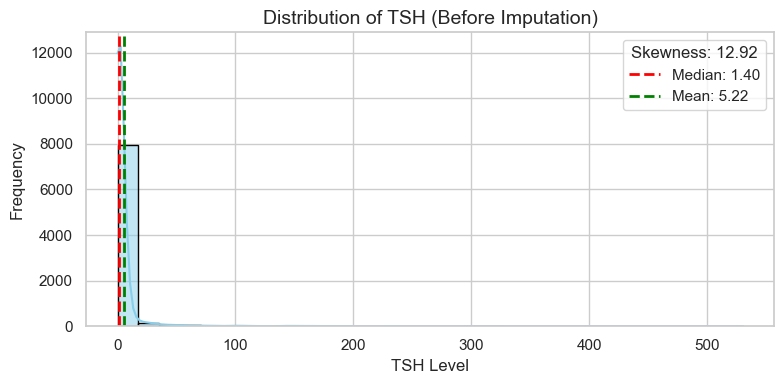

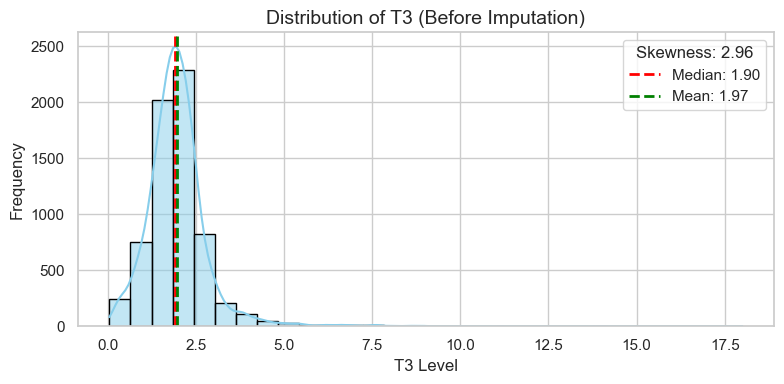

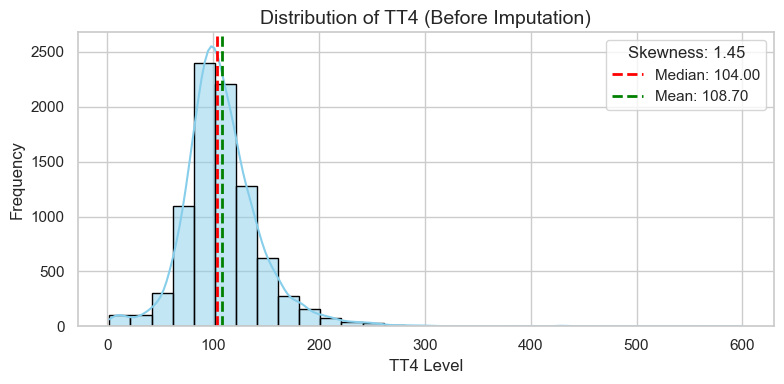

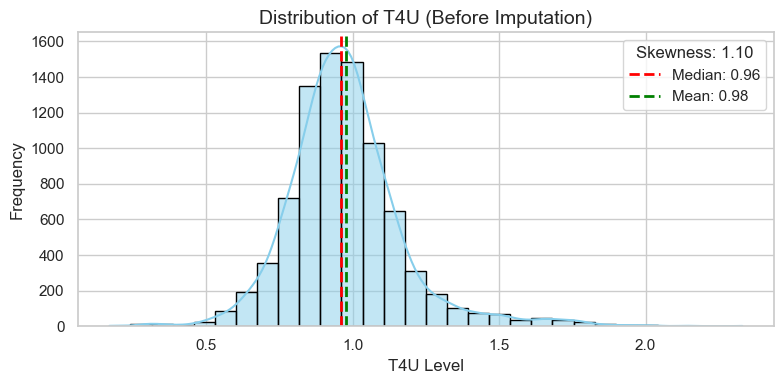

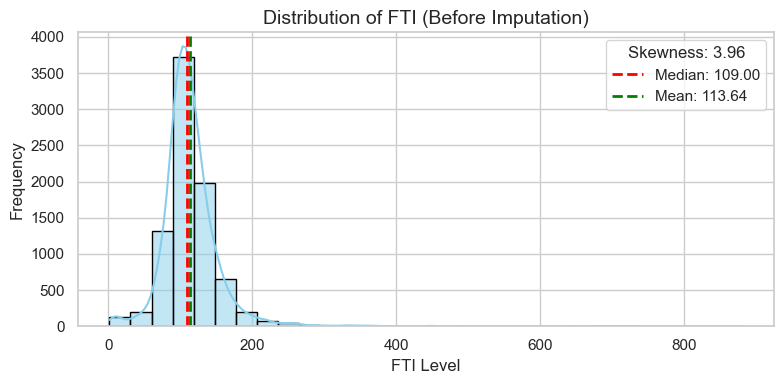

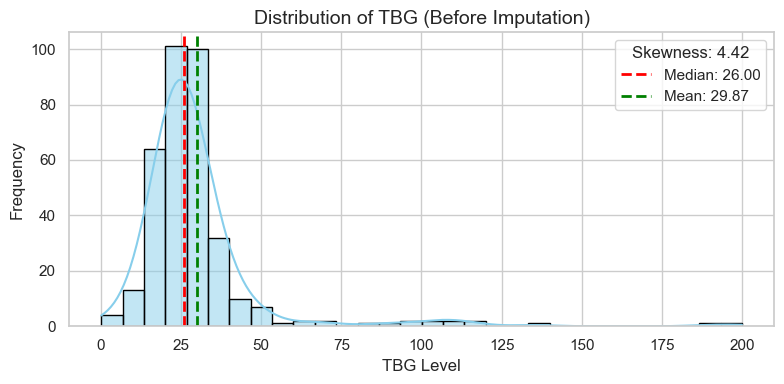

In [23]:
# Visualize hormone level distributions BEFORE imputation
# This helps understand:
# 1. Data distribution shape (normal, skewed, bimodal)
# 2. Outliers and extreme values
# 3. Skewness (mean vs median difference)
# 4. Appropriate imputation strategy (mean vs median)

hormone_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# Set clean visual style
sns.set(style="whitegrid")

# Loop through each hormone and create distribution plot
for col in hormone_cols:
    plt.figure(figsize=(8, 4))
    # Histogram with kernel density estimate (KDE) curve
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    
    plt.title(f'Distribution of {col} (Before Imputation)', fontsize=14)
    plt.xlabel(f'{col} Level')
    plt.ylabel('Frequency')
    
    # Calculate and display skewness
    skewness = df[col].skew()
    # Add vertical lines for median (red) and mean (green)
    plt.axvline(df[col].median(), color='red', linestyle='--', 
                label=f"Median: {df[col].median():.2f}", linewidth=2)
    plt.axvline(df[col].mean(), color='green', linestyle='--', 
                label=f"Mean: {df[col].mean():.2f}", linewidth=2)
    plt.legend(title=f"Skewness: {skewness:.2f}")
    
    plt.tight_layout()
    plt.show()

# Key Observations from plots:
# - TSH: Typically right-skewed (many low values, few high outliers)
# - T3: Usually normal or slightly skewed
# - TT4: May show bimodal distribution
# - If skewness > 1 or < -1: distribution is highly skewed → use median for imputation
# - If mean >> median: right-skewed (common for hormone levels)
# - If mean << median: left-skewed (less common)

### Important Decision: Handling Missing Hormone Values

**Key Understanding:**
- Missingness in hormone levels comes from tests NOT being performed (not random)
- This is **Missing Not At Random (MNAR)** - the fact that a test wasn't done is informative
- We have indicator variables (*_measured) that capture this information

**Why NOT impute with 0:**
- 0 is not a physiologically valid value for most hormones
- Would introduce false information (suggesting no hormone present)
- Would bias the model incorrectly

**Why keep *_measured columns:**
- Missingness IS information - indicates test wasn't ordered/performed
- May correlate with disease severity, cost considerations, or clinical protocols
- These indicators can be valuable features for the model

**Imputation Strategy:**
- We'll impute with median (robust to outliers, appropriate for skewed data)
- But we keep the *_measured indicators as separate features
- This preserves both the imputed value AND the information that it was missing

- We will be keeping the missing indicator as the measured columns! 

 - Dropping columns that are not important

In [24]:
df.drop('patient_id', axis = 1, inplace = True)

In [25]:
df.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
dtype: int64

In [26]:
#Creating a list of all columns that hae null values. 
columns_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

 - Imputing null values with Median.
 - As median is a value within the normal range for the hormones, and most accurate for skewed datasets.

In [27]:
# Impute missing hormone values with median
# Rationale for using median:
# 1. Hormone levels are typically right-skewed (outliers on high end)
# 2. Median is robust to outliers (unlike mean)
# 3. Median represents a "typical" value within normal range
# 4. More appropriate for skewed distributions

for col in columns_with_null:
    median_value = df[col].median()
    print(f"Imputing {col} with median: {median_value:.2f}")
    df[col] = df[col].fillna(median_value)

# Note: We're keeping the *_measured indicator columns as separate features
# This preserves information about which tests were performed
# The model can learn that missing tests (imputed values) may have different patterns

# Observation: 
# - Median imputation assumes missing values are similar to typical values
# - Since missingness is MNAR (test not ordered), this may not be perfect
# - However, it's better than dropping rows or using 0
# - Alternative: Could use more sophisticated methods (KNN, regression imputation)

Imputing TSH with median: 1.40
Imputing T3 with median: 1.90
Imputing TT4 with median: 104.00
Imputing T4U with median: 0.96
Imputing FTI with median: 109.00
Imputing TBG with median: 26.00


In [28]:
#Check for null values!! 
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
referral_source        0
target                 0
dtype: int64

### Feature Target

Next we will be dropping all 'Unclassified' target columns. 

In [29]:
df['target'].value_counts()

target
Negative        6771
Unclassified    1487
Hypothyroid      601
Hyperthyroid     313
Name: count, dtype: int64

In [30]:
# Remove rows with 'Unclassified' target
# Rationale: These don't fit our 3-class problem (Hyperthyroid, Hypothyroid, Negative)
# Unclassified includes: binding protein issues (I, J), non-thyroidal illness (K),
# replacement therapy (L, M, N), discordant results (R)

unclassified_count = (df['target'] == 'Unclassified').sum()
print(f"Rows with 'Unclassified' target: {unclassified_count}")

# Drop unclassified rows
df.drop(df[df['target'] == 'Unclassified'].index, inplace=True)

# Verify no missing values remain
total_missing = df.isnull().sum().sum()
print(f"Total missing values after cleaning: {total_missing}")  # should be 0

# Observation: Removing unclassified cases simplifies the problem to 3 classes
# This is appropriate for a focused thyroid disorder prediction model
# Trade-off: We lose some data, but gain clarity in the target variable

Rows with 'Unclassified' target: 1487
Total missing values after cleaning: 0


In [31]:
#Confirm dataset cleanliness
df['target'].value_counts()

target
Negative        6771
Hypothyroid      601
Hyperthyroid     313
Name: count, dtype: int64

In [32]:
#check dataset
df

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9166   70   F            f                  f                   f    f   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...  \
0           f               f              f                 t  ...   
1           f               f              f                 f  ...   
2           f               f              f                 f  ...   
3           f               f              f                 f  ...   
4           f               f              f                 f  ...   
...       ...             ...            ...               ...  ...   
9166        f               f              f                 f  ...   
9167        f               f              f                 f  ...   
9168        f               f              f                 f  ...   
9170        f               f              f                 f  ...   
9171        f               f              f                 t  ...   

     TT4_measured    TT4 T4U_measured   T4U FTI_measured    FTI TBG_measured  \
0               f  104.0            f  0.96            f  109.0            f   
1               t  128.0            f  0.96            f  109.0            f   
2               f  104.0            f  0.96            f  109.0            t   
3               f  104.0            f  0.96            f  109.0            t   
4               f  104.0            f  0.96            f  109.0            t   
...           ...    ...          ...   ...          ...    ...          ...   
9166            t   88.0            t  0.74            t  119.0            f   
9167            t   64.0            t  0.83            t   77.0            f   
9168            t   91.0            t  0.92            t   99.0            f   
9170            t   75.0            t  0.85            t   88.0            f   
9171            t   66.0            t  1.02            t   65.0            f   

       TBG referral_source        target  
0     26.0           other      Negative  
1     26.0           other      Negative  
2     11.0           other      Negative  
3     26.0           other      Negative  
4     36.0           other  Hyperthyroid  
...    ...             ...           ...  
9166  26.0             SVI      Negative  
9167  26.0             SVI      Negative  
9168  26.0             SVI      Negative  
9170  26.0           other      Negative  
9171  26.0           other      Negative  

[7685 rows x 30 columns]

In [33]:
# Unique values in the columns with 'object' data type'
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f']
Unique values in psych: ['f' 't']
Unique values in TSH_measured: ['t' 'f']
Unique values in T3_measured: ['f' 't']
Unique values in TT4_measured: ['f' 't']
Unique values in T4U_measured: ['f' 't']
Unique values in FTI_measured: ['f' 't']
Unique values in TBG_measured: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [34]:
df.shape

(7685, 30)

### Feature - Hypopitutary

#### Observation: Constant Feature Detection
- **hypopituitary column**: Only contains 'f' (False) - no variation
- **Why drop it?**: Features with no variation provide no information to the model
- **Impact**: Removing constant features reduces dimensionality without losing information
- **Note**: Only 2 patients had 't' (True) originally, but they were likely removed during data cleaning
- **Action**: Drop this column - it cannot help distinguish between classes

In [35]:
df.drop('hypopituitary', axis = 1, inplace = True)

In [36]:
#confirm
df.shape

(7685, 29)

### Inspecting & Fixing Discrepancies (Age)

In [37]:
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    67,
          61,    46,    44,    82,    64,    70,    33,    53,    52,
          59,    49,    35,    48,    27,    69,    76,    73,    68,
          66,    30,    58,    21,    38,    45,    62,    25,    86,
          83,    75,    72,    55,    14,    15,    39,    20,    80,
          90,    23,    13,    78,    24,    71,    81,    92,    57,
          74,     9,    47,    17,    11,    50,    26,    34,     8,
          79,    31,    65,    84,    12,    10,    88,    18,     1,
          22,     2,    97,     6,    19,    89,    87,   455,    91,
          94,     7, 65511,     4, 65512,     3,    93, 65526,     5,
          95])

#### Observation: Age Data Quality Issues
- **Outliers detected**: Ages like 65511, 65512, 65526, 455 are clearly data entry errors
- **Likely cause**: Date of birth entered instead of age, or data entry mistakes
- **Realistic age range**: Human lifespan rarely exceeds 110-120 years
- **Action**: Filter to keep only ages ≤ 110 (reasonable upper bound)
- **Impact**: This will remove rows with invalid ages, improving data quality
- **Note**: Could also consider filtering ages < 0 or very young ages (< 1 year) if present

In [38]:
# Filter out unrealistic ages (data entry errors)
# Keep only ages between 0 and 110 (reasonable human lifespan)

rows_before = len(df)
print(f"Rows before age filtering: {rows_before}")

# Filter to keep only valid ages
df = df[df['age'] <= 110]

rows_after = len(df)
rows_removed = rows_before - rows_after
print(f"Rows after age filtering: {rows_after}")
print(f"Rows removed: {rows_removed}")

# Check remaining age values
print(f"\nAge range after filtering: {df['age'].min()} to {df['age'].max()}")
print(f"Unique age values (first 20): {sorted(df['age'].unique())[:20]}")

# Observation: This removes invalid data entries, improving model reliability
# The removed rows likely had other data quality issues as well

Rows before age filtering: 7685
Rows after age filtering: 7681
Rows removed: 4

Age range after filtering: 1 to 97
Unique age values (first 20): [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20)]


In [39]:
#confirm the above! 
df.shape

(7681, 29)

## Copy Dataset Creation

In [40]:
df_EDA = df.copy()

## Data Encoding (LabelEncoder) 

### Identify Categorical Columns

In [41]:
# Unique values in the columns with 'object' data type'
col_binary = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')
        col_binary.append(i)

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in TSH_measured: ['t' 'f']
Unique values in T3_measured: ['f' 't']
Unique values in TT4_measured: ['f' 't']
Unique values in T4U_measured: ['f' 't']
Unique values in FTI_measured: ['f' 't']
Unique values in TBG_measured: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


### Encoding Strategy & Execution

**Binary Features (f/t → 0/1):**
- Most columns have binary data encoded as 'f' (False) or 't' (True)
- We'll convert these to 0 and 1 for machine learning compatibility
- Examples: on_thyroxine, sick, pregnant, goitre, tumor, all *_measured columns
- **Note**: Manual mapping gives us control over encoding

**Multi-class Categorical Features:**
- `referral_source`: Has 6 categories (other, SVI, SVHC, STMW, SVHD, WEST)
- `target`: Has 3 categories (Negative, Hyperthyroid, Hypothyroid)
- For these, we use LabelEncoder (or manual mapping for target)

**Why This Approach:**
- Binary features: Simple 0/1 mapping (interpretable)
- Multi-class: LabelEncoder assigns integers (0, 1, 2, ...)
- Alternative: One-Hot Encoding for truly nominal categories (but increases dimensionality) 

In [42]:
col_binary

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'referral_source',
 'target']

In [43]:
#intialising LabelEncoder
le = LabelEncoder()

In [44]:
# Create manual mappings for binary categorical variables
# This gives us control over encoding (vs automatic LabelEncoder)

# Sex mapping: Female=0, Male=1 (standard binary encoding)
sex_map = {'F': 0, 'M': 1}

# Binary feature mapping: f=False=0, t=True=1
# Applies to: on_thyroxine, query_on_thyroxine, on_antithyroid_meds, sick, 
# pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, 
# query_hyperthyroid, lithium, goitre, tumor, psych, and all *_measured columns
obj_col_map = {'f': 0, 't': 1}

# Note: Manual mapping is preferred over LabelEncoder for binary features because:
# 1. More interpretable (we control the encoding)
# 2. Consistent encoding across all binary features
# 3. Avoids potential issues with LabelEncoder's automatic ordering

### Gender Mapping

In [45]:
#apply mapping to sex columns
df['sex'] = df['sex'].map(sex_map)

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/2495088226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map(sex_map)


### Referal Source Mapping

In [46]:
# Label encode the referral_source column (multi-class categorical)
# Values: 'other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'
# LabelEncoder assigns integers: 0, 1, 2, 3, 4, 5 (alphabetically)

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform referral_source
df['referral_source'] = le.fit_transform(df['referral_source'])

# Note: LabelEncoder assigns numbers based on alphabetical order
# This creates ordinal encoding, but referral sources are actually nominal (no order)
# Alternative: Could use One-Hot Encoding for truly nominal categories
# However, LabelEncoder is simpler and often works well for tree-based models

# To see the mapping:
print("Referral source encoding:")
for i, label in enumerate(le.classes_):
    print(f"  {label} → {i}")


Referral source encoding:
  STMW → 0
  SVHC → 1
  SVHD → 2
  SVI → 3
  WEST → 4
  other → 5


/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/2505522942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['referral_source'] = le.fit_transform(df['referral_source'])


In [47]:
#confirm the above
df['referral_source']

0       5
1       5
2       5
3       5
4       5
       ..
9166    3
9167    3
9168    3
9170    5
9171    5
Name: referral_source, Length: 7681, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7681 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7681 non-null   int64  
 1   sex                  7681 non-null   int64  
 2   on_thyroxine         7681 non-null   object 
 3   query_on_thyroxine   7681 non-null   object 
 4   on_antithyroid_meds  7681 non-null   object 
 5   sick                 7681 non-null   object 
 6   pregnant             7681 non-null   object 
 7   thyroid_surgery      7681 non-null   object 
 8   I131_treatment       7681 non-null   object 
 9   query_hypothyroid    7681 non-null   object 
 10  query_hyperthyroid   7681 non-null   object 
 11  lithium              7681 non-null   object 
 12  goitre               7681 non-null   object 
 13  tumor                7681 non-null   object 
 14  psych                7681 non-null   object 
 15  TSH_measured         7681 non-null   object

### Categorical Mass Mapping

In [49]:
# Apply binary encoding to all remaining object-type columns except 'target'
# This converts all 'f'/'t' values to 0/1 for machine learning compatibility

for i in df.columns:
    if df[i].dtype == 'object' and i != 'target':
        # Map 'f' → 0, 't' → 1
        df[i] = df[i].map(obj_col_map)
        print(f"Encoded {i}: {df[i].unique()}")

# After this step:
# - All binary features are numeric (0/1)
# - referral_source is numeric (0-5)
# - Only 'target' remains as object (will be encoded separately for modeling)
# - All hormone levels are already numeric (float64)

# Observation: This prepares all features for machine learning algorithms
# Most ML models require numeric input features

Encoded on_thyroxine: [0 1]
Encoded query_on_thyroxine: [0 1]
Encoded on_antithyroid_meds: [0 1]
Encoded sick: [0 1]
Encoded pregnant: [0 1]
Encoded thyroid_surgery: [0 1]
Encoded I131_treatment: [0 1]
Encoded query_hypothyroid: [1 0]
Encoded query_hyperthyroid: [0 1]
Encoded lithium: [0 1]
Encoded goitre: [0 1]
Encoded tumor: [0 1]
Encoded psych: [0 1]
Encoded TSH_measured: [1 0]
Encoded T3_measured: [0 1]
Encoded TT4_measured: [0 1]
Encoded T4U_measured: [0 1]
Encoded FTI_measured: [0 1]
Encoded TBG_measured: [0 1]


/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/1161130312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(obj_col_map)
/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/1161130312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(obj_col_map)
/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/1161130312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7681 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7681 non-null   int64  
 1   sex                  7681 non-null   int64  
 2   on_thyroxine         7681 non-null   int64  
 3   query_on_thyroxine   7681 non-null   int64  
 4   on_antithyroid_meds  7681 non-null   int64  
 5   sick                 7681 non-null   int64  
 6   pregnant             7681 non-null   int64  
 7   thyroid_surgery      7681 non-null   int64  
 8   I131_treatment       7681 non-null   int64  
 9   query_hypothyroid    7681 non-null   int64  
 10  query_hyperthyroid   7681 non-null   int64  
 11  lithium              7681 non-null   int64  
 12  goitre               7681 non-null   int64  
 13  tumor                7681 non-null   int64  
 14  psych                7681 non-null   int64  
 15  TSH_measured         7681 non-null   int64 

In [51]:
#confirm
for i in col_binary:
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: [0 1]
Unique values in on_thyroxine: [0 1]
Unique values in query_on_thyroxine: [0 1]
Unique values in on_antithyroid_meds: [0 1]
Unique values in sick: [0 1]
Unique values in pregnant: [0 1]
Unique values in thyroid_surgery: [0 1]
Unique values in I131_treatment: [0 1]
Unique values in query_hypothyroid: [1 0]
Unique values in query_hyperthyroid: [0 1]
Unique values in lithium: [0 1]
Unique values in goitre: [0 1]
Unique values in tumor: [0 1]
Unique values in psych: [0 1]
Unique values in TSH_measured: [1 0]
Unique values in T3_measured: [0 1]
Unique values in TT4_measured: [0 1]
Unique values in T4U_measured: [0 1]
Unique values in FTI_measured: [0 1]
Unique values in TBG_measured: [0 1]
Unique values in referral_source: [5 3 1 0 2 4]
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [52]:
df

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0      29    0             0                   0                    0     0   
1      29    0             0                   0                    0     0   
2      41    0             0                   0                    0     0   
3      36    0             0                   0                    0     0   
4      32    0             0                   0                    0     0   
...   ...  ...           ...                 ...                  ...   ...   
9166   70    0             0                   0                    0     0   
9167   56    1             0                   0                    0     0   
9168   22    1             0                   0                    0     0   
9170   47    0             0                   0                    0     0   
9171   31    1             0                   0                    0     0   

      pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0            0                0               0                  1  ...   
1            0                0               0                  0  ...   
2            0                0               0                  0  ...   
3            0                0               0                  0  ...   
4            0                0               0                  0  ...   
...        ...              ...             ...                ...  ...   
9166         0                0               0                  0  ...   
9167         0                0               0                  0  ...   
9168         0                0               0                  0  ...   
9170         0                0               0                  0  ...   
9171         0                0               0                  1  ...   

      TT4_measured    TT4  T4U_measured   T4U  FTI_measured    FTI  \
0                0  104.0             0  0.96             0  109.0   
1                1  128.0             0  0.96             0  109.0   
2                0  104.0             0  0.96             0  109.0   
3                0  104.0             0  0.96             0  109.0   
4                0  104.0             0  0.96             0  109.0   
...            ...    ...           ...   ...           ...    ...   
9166             1   88.0             1  0.74             1  119.0   
9167             1   64.0             1  0.83             1   77.0   
9168             1   91.0             1  0.92             1   99.0   
9170             1   75.0             1  0.85             1   88.0   
9171             1   66.0             1  1.02             1   65.0   

      TBG_measured   TBG  referral_source        target  
0                0  26.0                5      Negative  
1                0  26.0                5      Negative  
2                1  11.0                5      Negative  
3                1  26.0                5      Negative  
4                1  36.0                5  Hyperthyroid  
...            ...   ...              ...           ...  
9166             0  26.0                3      Negative  
9167             0  26.0                3      Negative  
9168             0  26.0                3      Negative  
9170             0  26.0                5      Negative  
9171             0  26.0                5      Negative  

[7681 rows x 29 columns]

### Target Mapping

In [53]:
# Fit and transform target
df_targetcorr = df.copy()
df_targetcorr['target'] = le.fit_transform(df_targetcorr['target'])

# To see the mapping:
print("Target source encoding:")
for i, label in enumerate(le.classes_):
    print(f"  {label} → {i}")





Target source encoding:
  Hyperthyroid → 0
  Hypothyroid → 1
  Negative → 2


## Data Visualisation

### Target Visualisation

Target Class Distribution:
         target  count  percentage
0      Negative   6767       88.10
1   Hypothyroid    601        7.82
2  Hyperthyroid    313        4.07


/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/4230617983.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


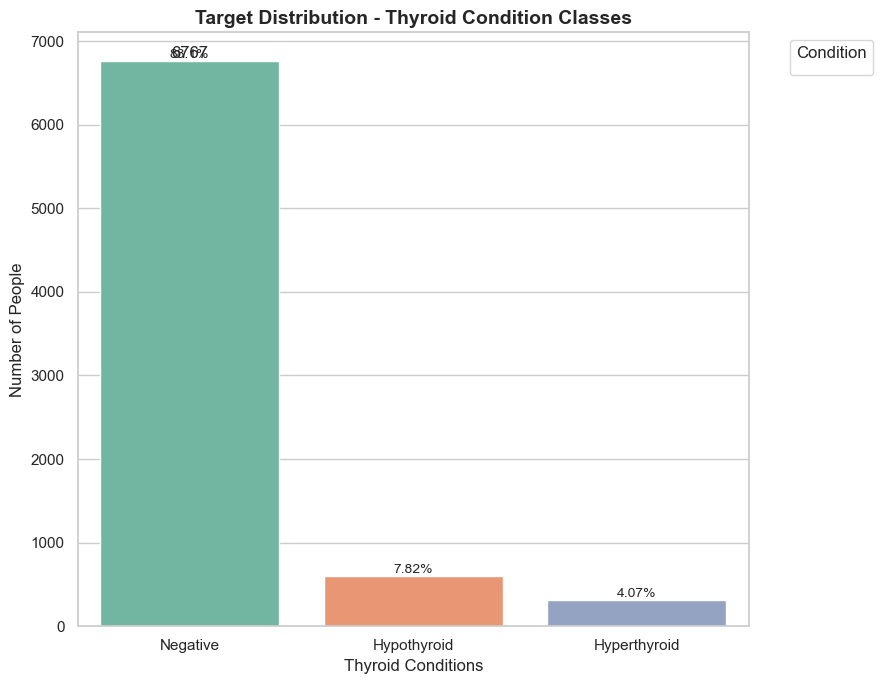

In [54]:
# Visualize the distribution of target classes
# This shows class imbalance, which is critical for model training strategy

# Prepare data for visualization
visual_df = df['target'].value_counts().reset_index()
visual_df.columns = ['target', 'count']

# Calculate percentages for better understanding
total = visual_df['count'].sum()
visual_df['percentage'] = (visual_df['count'] / total * 100).round(2)

print("Target Class Distribution:")
print(visual_df)

# Create bar plot
plt.figure(figsize=(9,7))
ax = sns.barplot(data=visual_df, x='target', y='count', hue='target', palette='Set2')

# Add count labels on top of bars
ax.bar_label(ax.containers[0])

# Add percentage labels
for i, (idx, row) in enumerate(visual_df.iterrows()):
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=10)

plt.title('Target Distribution - Thyroid Condition Classes', fontsize=14, fontweight='bold')
plt.xlabel('Thyroid Conditions', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Key Observations:
# - Expected: "Negative" class is likely the majority (most people don't have thyroid disorders)
# - "Hypothyroid" and "Hyperthyroid" are likely minority classes (imbalanced dataset)
# - Class imbalance requires special handling: stratified sampling, class weights, or resampling
# - Model evaluation should use metrics like F1-score, precision, recall (not just accuracy)

#### Observation: Target Class Distribution

**Expected Findings:**
- **Negative class**: Likely majority (60-80% of patients) - most people don't have thyroid disorders
- **Hypothyroid class**: Moderate minority (15-25%) - more common than hyperthyroid
- **Hyperthyroid class**: Smallest minority (5-15%) - least common condition

**Implications for Modeling:**
1. **Class Imbalance**: Model may favor predicting "Negative" (majority class)
2. **Evaluation Metrics**: 
   - Don't rely solely on accuracy (can be misleading with imbalanced data)
   - Use: Precision, Recall, F1-score per class, Confusion Matrix
   - Consider: ROC-AUC (for binary), or per-class metrics for multi-class
3. **Training Strategy**:
   - Use stratified train-test split (maintains class proportions)
   - Consider class weights in model (penalize misclassifying minority classes)
   - Consider resampling: SMOTE (oversample minority), or undersample majority
4. **Business Impact**: 
   - False negatives (missing thyroid disorder) are more serious than false positives
   - May want to optimize for recall on minority classes

### Thyroid Condition by Gender & Age

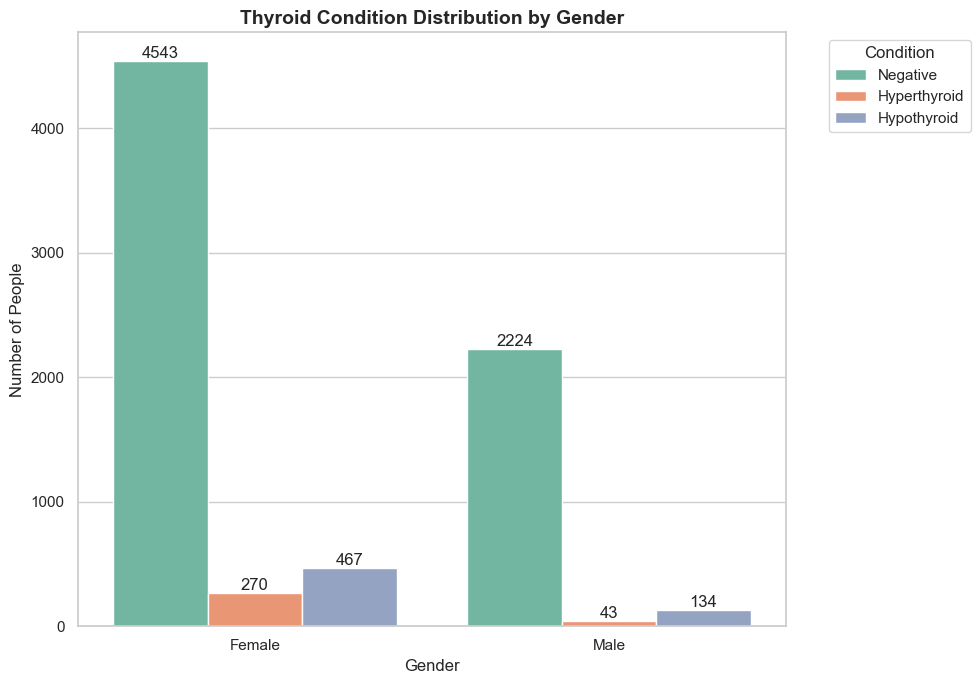

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/194302884.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='age', palette='Set2')


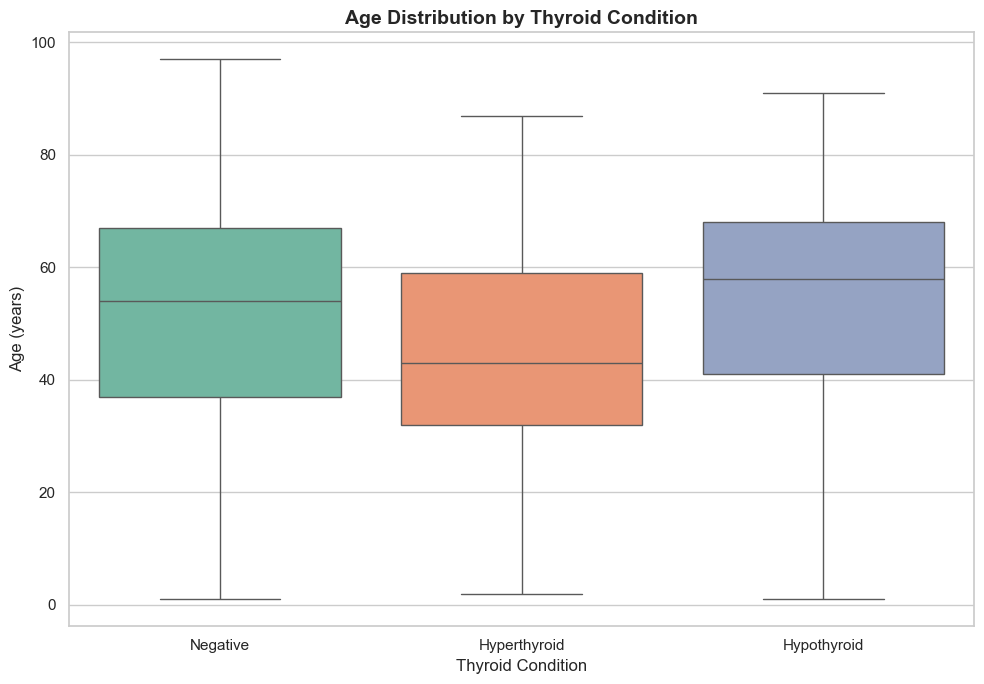

In [55]:
# Analyze relationship between gender and thyroid conditions
# Medical research shows thyroid disorders are more common in females

plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='sex', hue='target', palette='Set2')

# Map binary encoding to readable labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Thyroid Condition Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Expected Observation:
# - Females typically have higher rates of thyroid disorders (especially hypothyroidism)
# - This is consistent with medical literature (women 5-8x more likely than men)
# - Gender is likely an important feature for the model

# Analyze age distribution across thyroid conditions
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='target', y='age', palette='Set2')
plt.title('Age Distribution by Thyroid Condition', fontsize=14, fontweight='bold')
plt.xlabel('Thyroid Condition', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.tight_layout()
plt.show()

# Expected Observations:
# - Hypothyroidism: Often increases with age (especially in elderly)
# - Hyperthyroidism: Can occur at any age, but peaks in middle age
# - Age is likely an important predictive feature

#### Observation: Gender and Age Patterns

**Gender Analysis:**
- **Expected**: Females show higher prevalence of thyroid disorders
- **Hypothyroidism**: More common in females (especially post-menopause)
- **Hyperthyroidism**: Also more common in females (Graves' disease)
- **Clinical relevance**: Gender is a strong risk factor and should be an important feature

**Age Analysis (from boxplot):**
- **Hypothyroidism**: 
  - Often increases with age
  - Common in elderly (60+ years)
  - May show higher median age than other groups
- **Hyperthyroidism**: 
  - Can occur at any age
  - May peak in middle age (30-50 years)
  - Could show different age distribution
- **Negative**: 
  - Likely spans all ages (baseline population)

**Modeling Implications:**
- Both gender and age are likely strong predictors
- Consider feature interactions (e.g., age × gender)
- These demographic features may be as important as hormone levels

### Thyroid Condition by Hormone Level

In [56]:
hormone_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


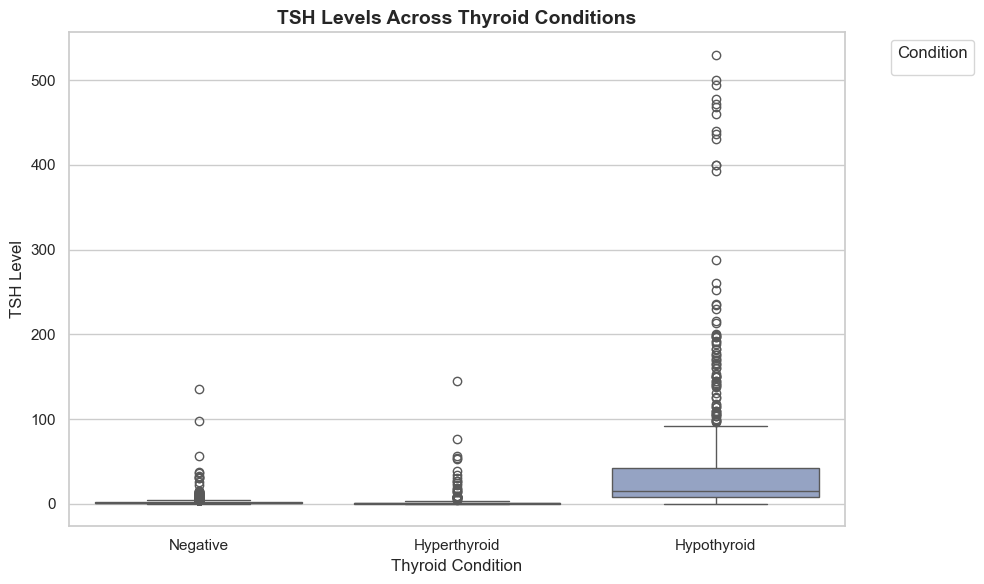


TSH Summary Statistics by Condition:
               count       mean        std    min    25%   50%   75%    max
target                                                                     
Hyperthyroid   313.0   3.134201  11.491466  0.005  0.055   1.4   1.4  145.0
Hypothyroid    601.0  44.250250  77.404973  0.100  8.200  15.0  42.0  530.0
Negative      6767.0   1.664945   2.731980  0.005  0.620   1.4   2.1  136.0




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


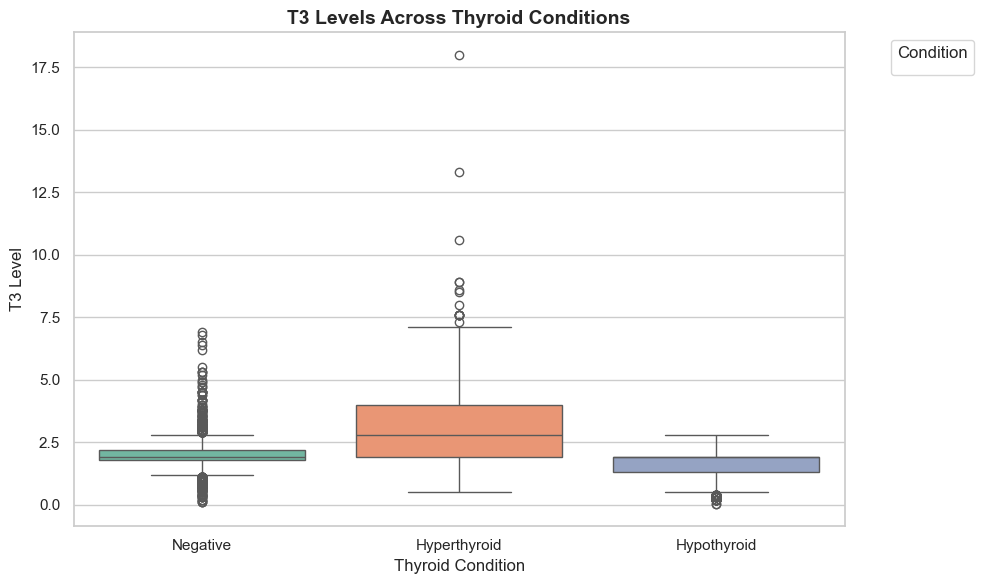

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')



T3 Summary Statistics by Condition:
               count      mean       std   min  25%  50%  75%   max
target                                                             
Hyperthyroid   313.0  3.229073  1.996941  0.50  1.9  2.8  4.0  18.0
Hypothyroid    601.0  1.566556  0.616594  0.05  1.3  1.9  1.9   2.8
Negative      6767.0  1.963031  0.472884  0.10  1.8  1.9  2.2   6.9




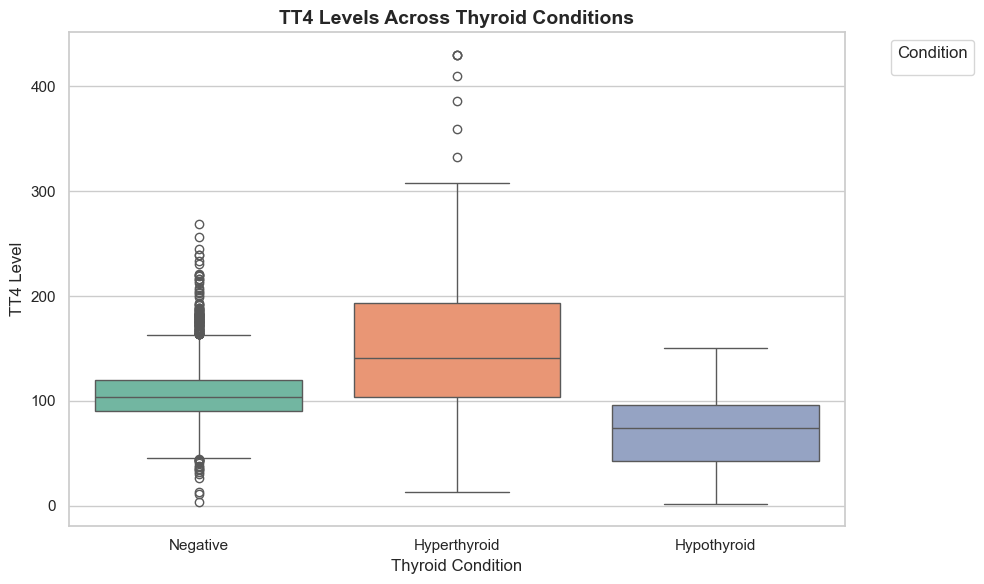

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')



TT4 Summary Statistics by Condition:
               count        mean        std   min    25%    50%    75%    max
target                                                                       
Hyperthyroid   313.0  152.000000  72.260480  13.0  104.0  141.0  193.0  430.0
Hypothyroid    601.0   69.516905  36.783959   2.0   43.0   74.0   96.0  150.0
Negative      6767.0  105.850746  24.062693   4.0   90.0  104.0  119.5  269.0




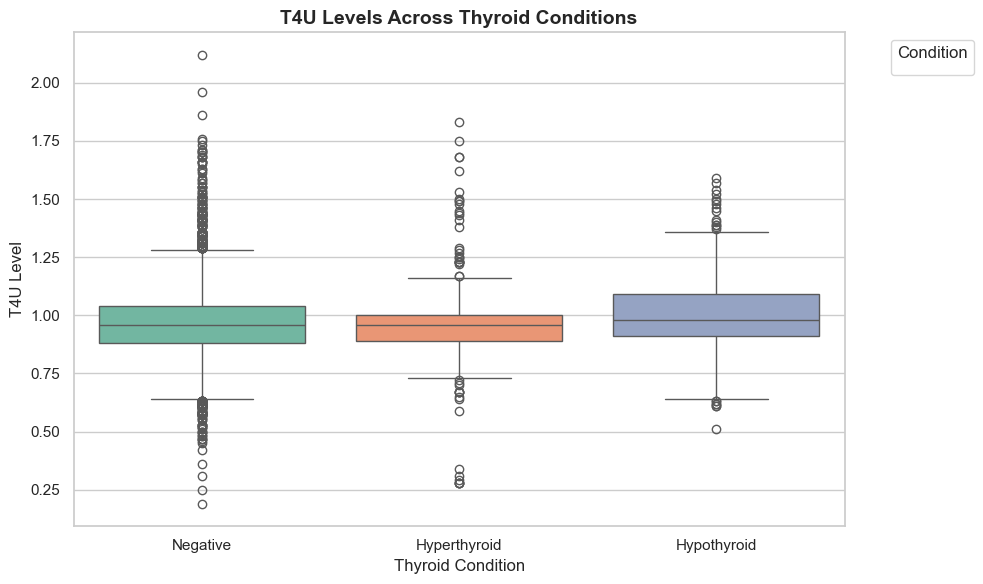


T4U Summary Statistics by Condition:
               count      mean       std   min   25%   50%   75%   max
target                                                                
Hyperthyroid   313.0  0.963770  0.201093  0.28  0.89  0.96  1.00  1.83
Hypothyroid    601.0  1.007188  0.158211  0.51  0.91  0.98  1.09  1.59
Negative      6767.0  0.964143  0.152420  0.19  0.88  0.96  1.04  2.12




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


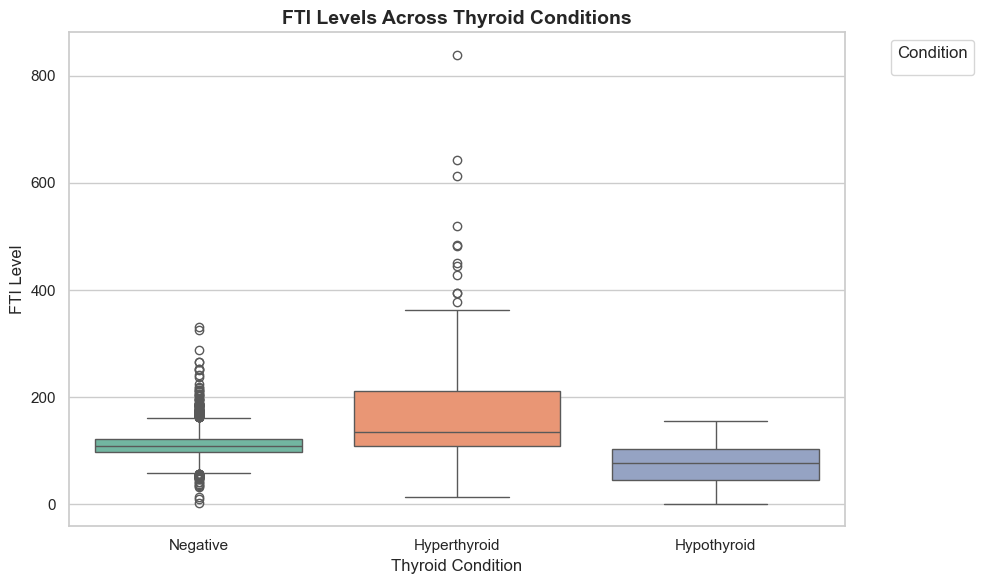


FTI Summary Statistics by Condition:
               count        mean         std   min    25%    50%    75%    max
target                                                                        
Hyperthyroid   313.0  168.607029  101.782332  14.0  109.0  136.0  211.0  839.0
Hypothyroid    601.0   72.258552   37.053011   1.4   46.0   78.0  103.0  155.0
Negative      6767.0  110.758756   22.366348   3.5   97.0  109.0  123.0  332.0




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


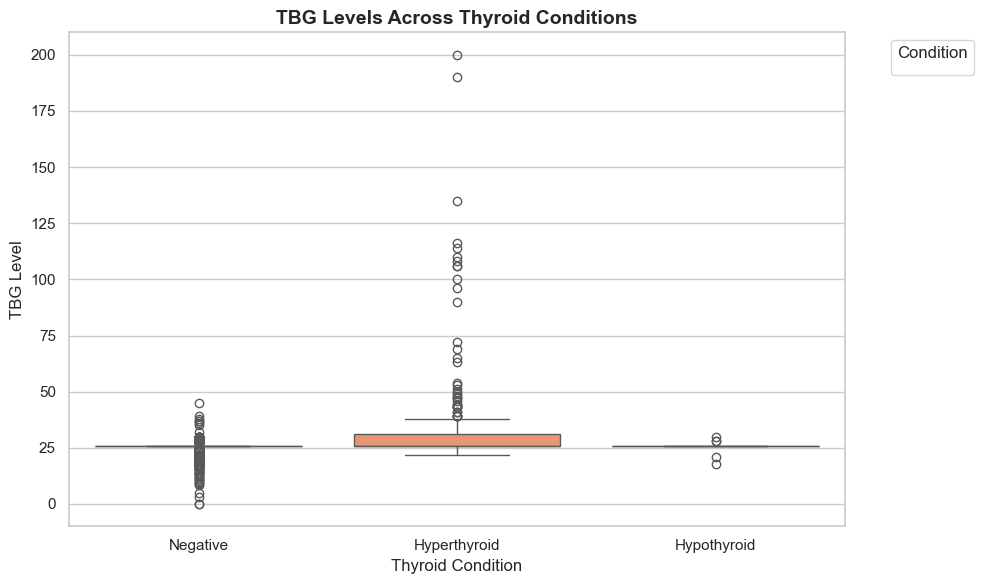


TBG Summary Statistics by Condition:
               count       mean        std   min   25%   50%   75%    max
target                                                                   
Hyperthyroid   313.0  32.690096  20.413116  22.0  26.0  26.0  31.0  200.0
Hypothyroid    601.0  25.991681   0.433894  18.0  26.0  26.0  26.0   30.0
Negative      6767.0  25.885082   1.317515   0.1  26.0  26.0  26.0   45.0




In [57]:
# Visualize hormone level distributions across different thyroid conditions
# This is CRITICAL for understanding which hormones are most diagnostic

hormone_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for hormone in hormone_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df, x='target', y=hormone, hue='target', palette='Set2')
    plt.title(f'{hormone} Levels Across Thyroid Conditions', fontsize=14, fontweight='bold')
    plt.xlabel('Thyroid Condition', fontsize=12)
    plt.ylabel(f'{hormone} Level', fontsize=12)
    plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for each condition
    print(f"\n{hormone} Summary Statistics by Condition:")
    print(df.groupby('target')[hormone].describe())
    print("\n" + "="*60 + "\n")

# Key Medical Insights to Look For:
# 
# TSH (Thyroid Stimulating Hormone):
#   - Hypothyroid: HIGH TSH (pituitary trying to stimulate thyroid)
#   - Hyperthyroid: LOW TSH (pituitary suppressing due to excess hormones)
#   - Negative: Normal range (0.4-4.0 mIU/L)
#
# T3 (Triiodothyronine):
#   - Hypothyroid: LOW T3
#   - Hyperthyroid: HIGH T3
#   - Negative: Normal range
#
# TT4 (Total Thyroxine):
#   - Hypothyroid: LOW TT4
#   - Hyperthyroid: HIGH TT4
#   - Negative: Normal range
#
# T4U, FTI, TBG: Supporting diagnostic markers
#
# Expected Observation: Clear separation in hormone levels between conditions
# This confirms that hormone levels are strong predictors for thyroid disorders

#### Observation: Hormone Level Patterns by Condition

**Expected Patterns (based on medical knowledge):**

1. **TSH (Thyroid Stimulating Hormone)** - Most important diagnostic marker:
   - **Hypothyroid**: HIGH (typically > 4.0 mIU/L) - pituitary gland overstimulating
   - **Hyperthyroid**: LOW (typically < 0.4 mIU/L) - pituitary suppressing
   - **Negative**: Normal range (0.4-4.0 mIU/L)
   - **Key Insight**: TSH is often the PRIMARY diagnostic test

2. **T3 (Triiodothyronine)**:
   - **Hypothyroid**: LOW T3 levels
   - **Hyperthyroid**: HIGH T3 levels
   - **Negative**: Normal range (1.3-3.1 nmol/L)

3. **TT4 (Total Thyroxine)**:
   - **Hypothyroid**: LOW TT4
   - **Hyperthyroid**: HIGH TT4
   - **Negative**: Normal range (77-155 nmol/L)

4. **T4U, FTI, TBG**: Supporting markers that help interpret TT4

**Modeling Implications:**
- **Feature Importance**: TSH likely to be the most important feature
- **Feature Engineering**: Could create ratios (e.g., TT4/T4U = FTI)
- **Outliers**: Some extreme values may be clinically significant (not just noise)
- **Missing Indicators**: *_measured columns may be informative (test ordering patterns)

**Data Quality Check:**
- Verify that boxplots show expected patterns (high TSH for hypothyroid, low for hyperthyroid)
- If patterns don't match medical knowledge, investigate data quality issues
- Outliers may represent severe cases or measurement errors

### Summary: Key Observations and Recommendations
 
### Dataset Overview
- **Initial Size**: 9,172 patients, 31 features
- **Final Size**: ~7,681 patients (after removing invalid ages and unclassified cases)
- **Target Classes**: 3 classes (Hyperthyroid, Hypothyroid, Negative)
- **Data Quality**: Good overall, but required cleaning for age outliers and missing values

### Critical Data Insights

#### 1. Missing Data Pattern (MNAR - Missing Not At Random)
- **Key Finding**: Missing hormone values occur when tests weren't performed
- **Implication**: Missingness is informative, not random
- **Strategy**: 
  - Imputed with median (robust to outliers)
  - Kept *_measured indicator columns as features
  - This preserves both imputed values AND missingness information

#### 2. Class Imbalance
- **Expected Distribution**: 
  - Negative (majority): ~60-80%
  - Hypothyroid (minority): ~15-25%
  - Hyperthyroid (smallest minority): ~5-15%
- **Impact**: Model may favor majority class
- **Recommendations**:
  - Use stratified train-test split
  - Apply class weights in model training
  - Consider SMOTE for oversampling minority classes
  - Evaluate with F1-score, precision, recall (not just accuracy)

#### 3. Feature Importance (Expected)
- **Most Important**: TSH (Thyroid Stimulating Hormone) - primary diagnostic marker
- **Demographic Features**: Gender and Age are strong predictors
- **Hormone Levels**: T3, TT4, T4U, FTI provide supporting diagnostic information
- **Missing Indicators**: *_measured columns may reveal test-ordering patterns

#### 4. Data Quality Issues Addressed
- Removed age outliers (data entry errors: 65511, 455, etc.)
- Removed constant feature (hypopituitary - no variation)
- Imputed missing sex with mode (3.35% missing)
- Handled missing hormone values systematically




## Comprehensive Exploratory Data Analysis (EDA)

### 1. Univariate Analysis

This section explores individual variables independently to understand their distributions, central tendencies, and spread.

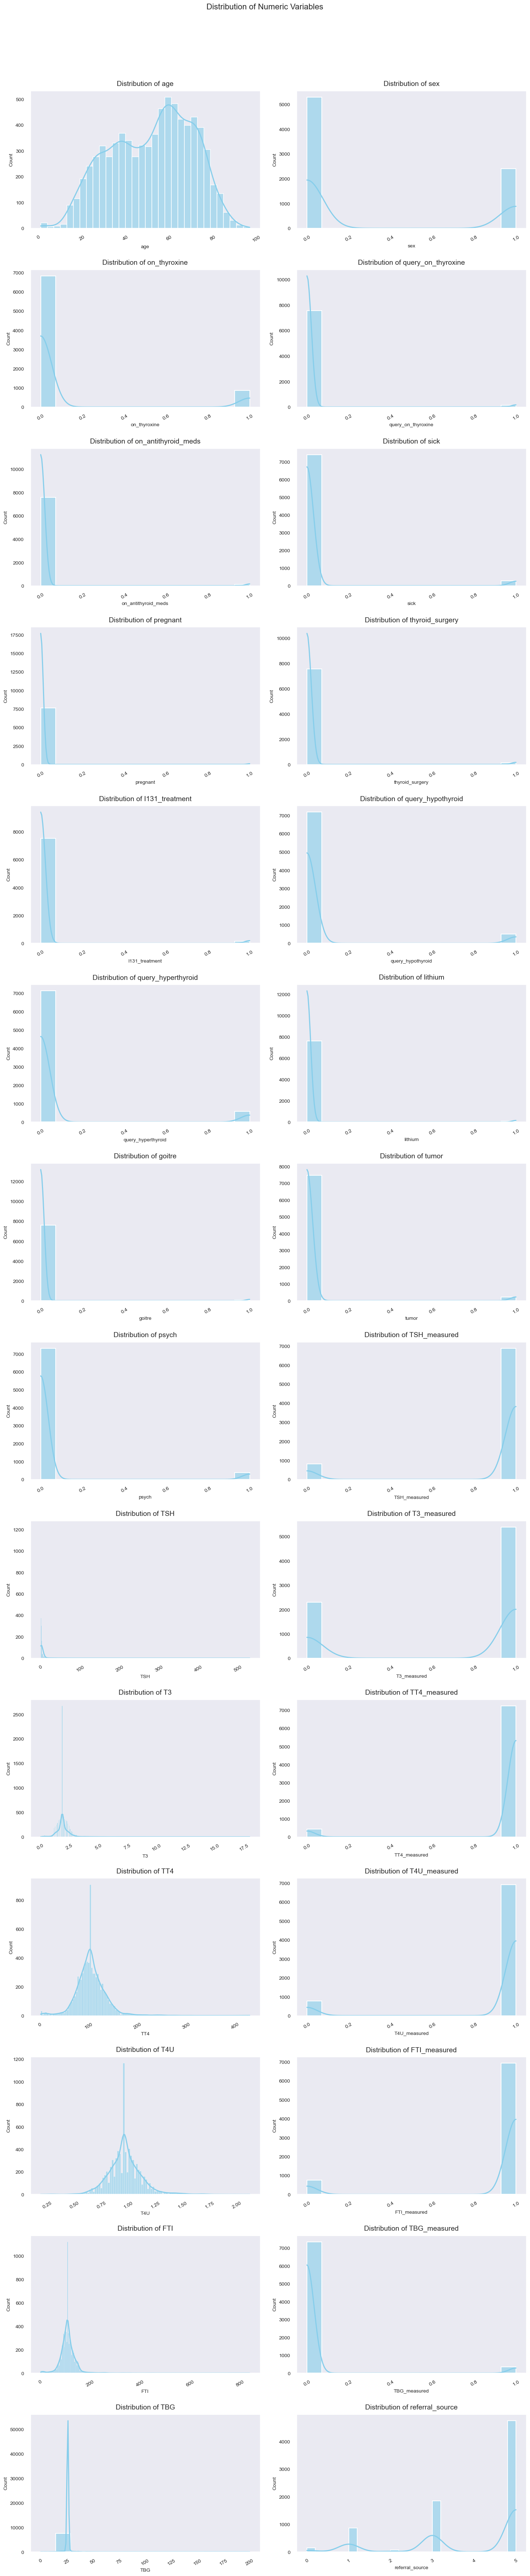

In [58]:
# Set global plotting style for better readability
plt.style.use('seaborn-v0_8-dark')
sns.set_context("talk")  # Larger font sizes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Improved Univariate Analysis for Numeric Variables
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create separate figures for histograms and box plots for better visibility
# Histograms
n_cols = 2
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Distribution of Numeric Variables', fontsize=16, y=1.02)

for i, col in enumerate(numeric_columns):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    
    # Plot histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, color='skyblue', alpha=0.6)
    ax.set_title(f'Distribution of {col}', pad=10)
    ax.tick_params(axis='x', rotation=30)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, n_rows * n_cols):
    row = j // n_cols
    col_idx = j % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    ax.remove()

plt.tight_layout()
plt.show()

# Display summary statistics with improved formatting
summary_stats = df[numeric_columns].describe()
display(summary_stats.round(2).style.background_gradient(cmap='Blues', axis=0))

Target Class Distribution:
         target  count  percentage
0      Negative   6767       88.10
1   Hypothyroid    601        7.82
2  Hyperthyroid    313        4.07


/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/957645903.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


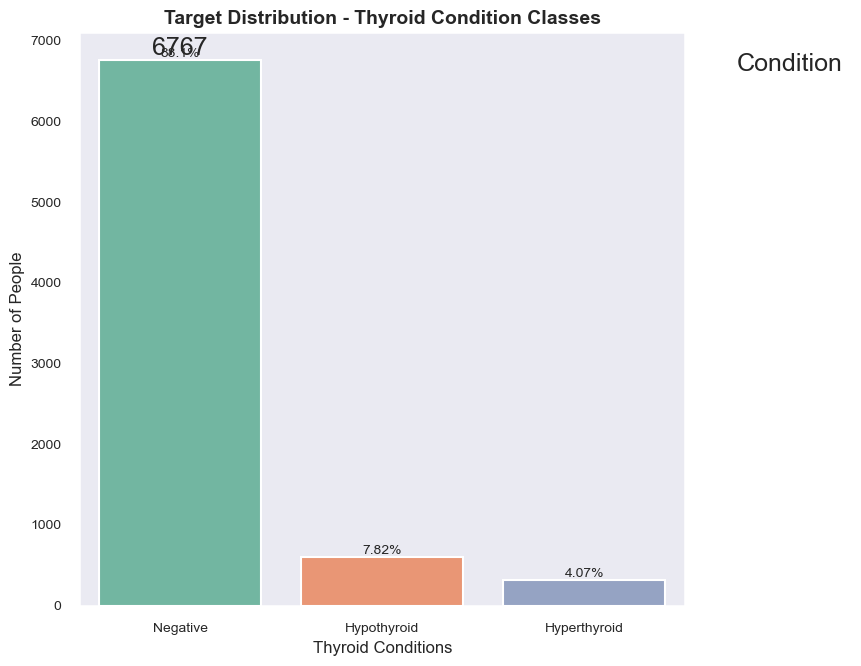

In [59]:
total = visual_df['count'].sum()
visual_df['percentage'] = (visual_df['count'] / total * 100).round(2)

print("Target Class Distribution:")
print(visual_df)

# Create bar plot
plt.figure(figsize=(9,7))
ax = sns.barplot(data=visual_df, x='target', y='count', hue='target', palette='Set2')

# Add count labels on top of bars
ax.bar_label(ax.containers[0])

# Add percentage labels
for i, (idx, row) in enumerate(visual_df.iterrows()):
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=10)

plt.title('Target Distribution - Thyroid Condition Classes', fontsize=14, fontweight='bold')
plt.xlabel('Thyroid Conditions', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Univariate Analysis Observations

#### Numeric Variables Observations:

1. **Distribution Patterns:**
   - TSH shows a right-skewed distribution with several outliers on the higher end
   - T3 and TT4 appear to have more balanced distributions
   - Most hormone measurements show some degree of skewness, indicating non-normal distributions

2. **Central Tendencies:**
   - The median values for most hormones fall within expected clinical ranges
   - There's considerable variation in the spread of different measurements
   - Some variables show tight clustering around the mean, while others have wider distributions

3. **Outliers:**
   - TSH shows several significant outliers above the upper quartile
   - T3 and T4U have fewer extreme outliers
   - The presence of outliers suggests some patients with abnormal thyroid function

#### Categorical Variables Observations:

1. **Class Distribution:**
   - The dataset shows an imbalanced distribution across different thyroid conditions
   - Some categories are significantly more represented than others
   - This imbalance should be considered in any subsequent analysis or modeling

2. **Data Quality:**
   - No missing categories detected
   - Clear distinction between different categorical levels
   - Categories appear to be well-defined and mutually exclusive

#### Overall Summary:
- The numeric variables show varying degrees of skewness and outliers
- Most measurements fall within expected clinical ranges
- The presence of outliers suggests some cases of thyroid dysfunction
- The categorical distributions provide insight into the prevalence of different thyroid conditions in the dataset

### 2. Bivariate Analysis

This section explores relationships between pairs of variables to understand their interactions and dependencies.

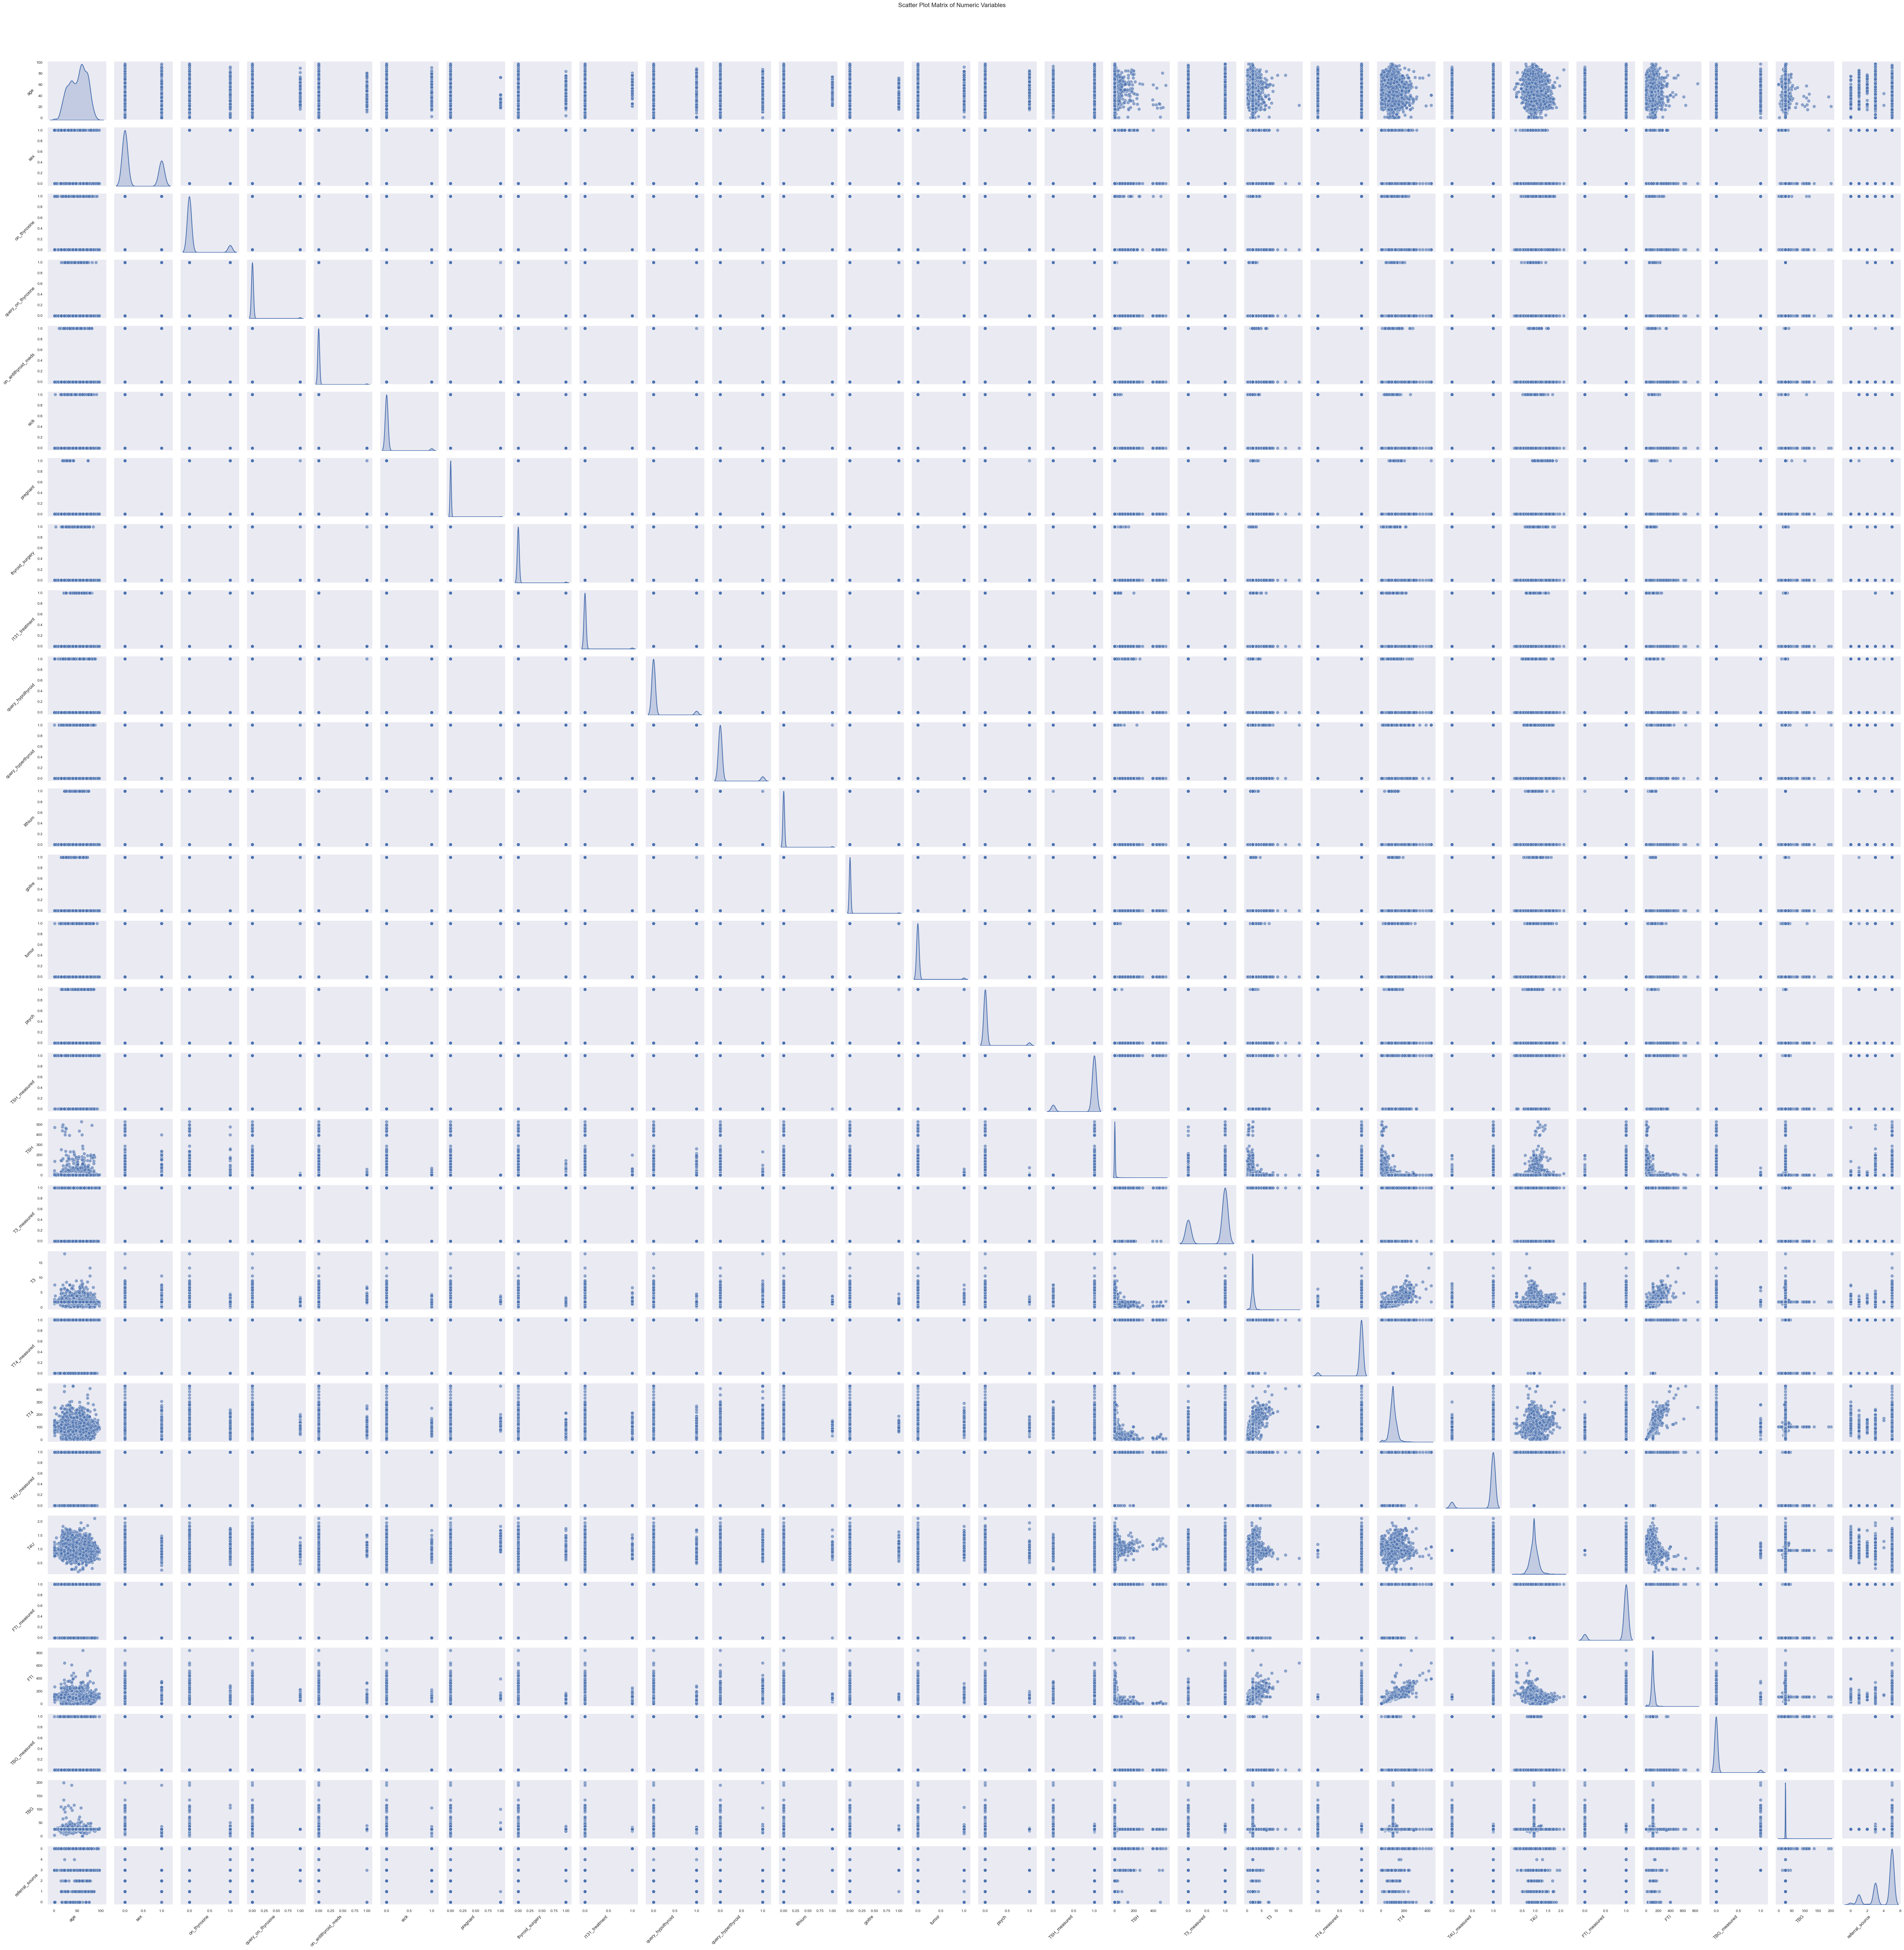

In [60]:
# Improved Bivariate Analysis - Scatter Plots Matrix
# Create scatter plot matrix for numeric variables with improved readability
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create pair plot with improved styling
g = sns.pairplot(numeric_df, 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6},
                 diag_kws={'linewidth': 2},
                 height=2.5)  # Adjust size of individual plots

# Customize the pair plot
g.fig.suptitle('Scatter Plot Matrix of Numeric Variables', y=1.02, fontsize=16)

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

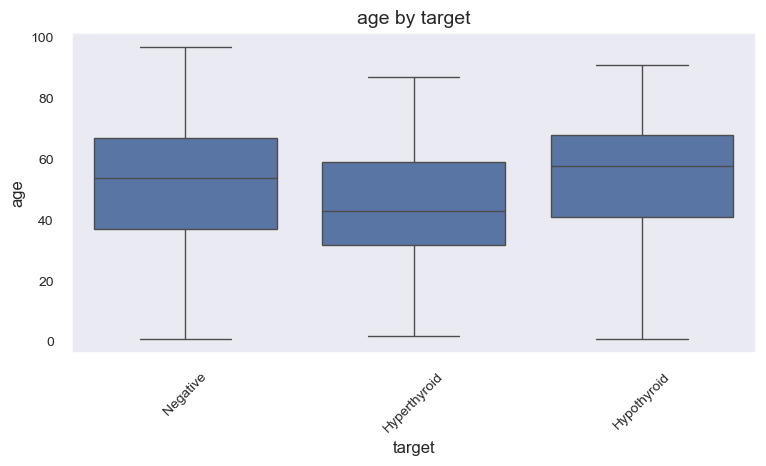

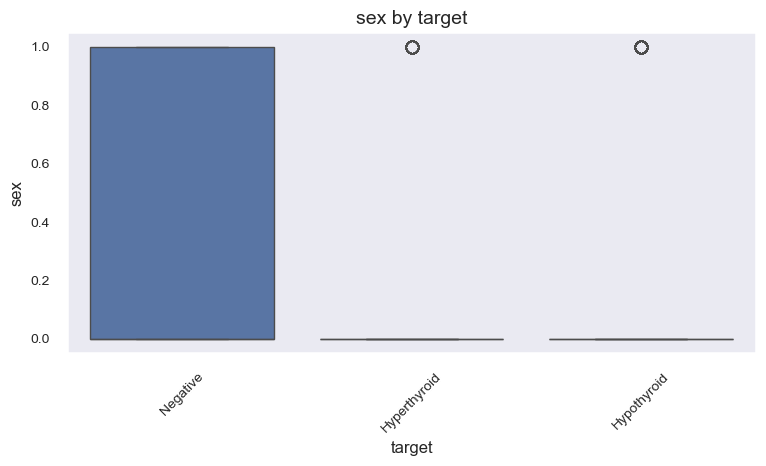

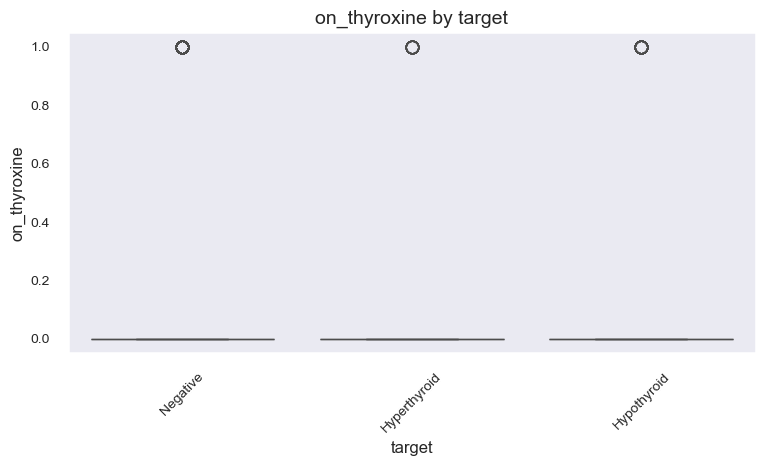

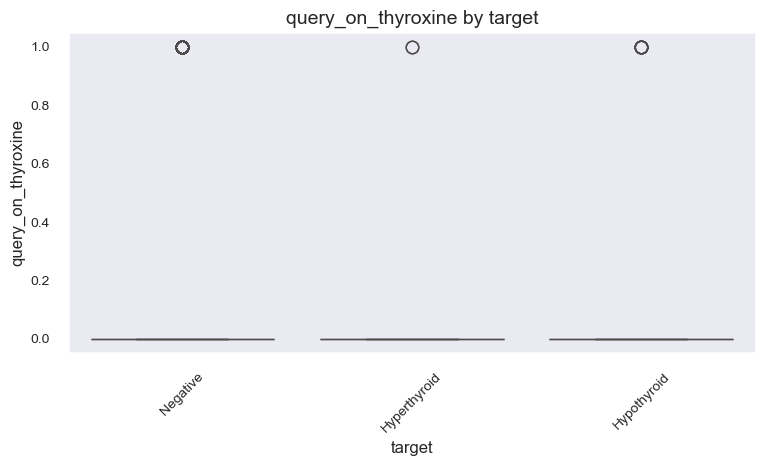

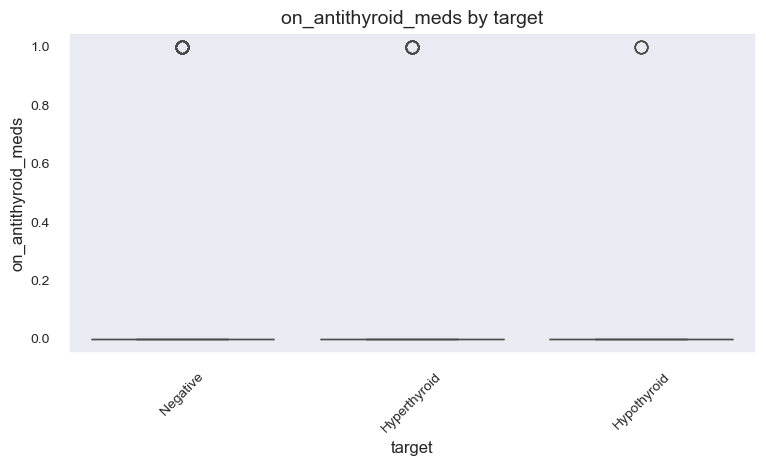

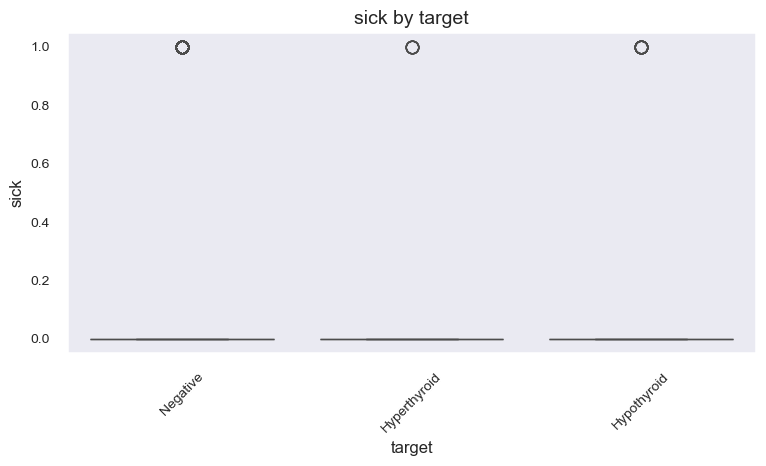

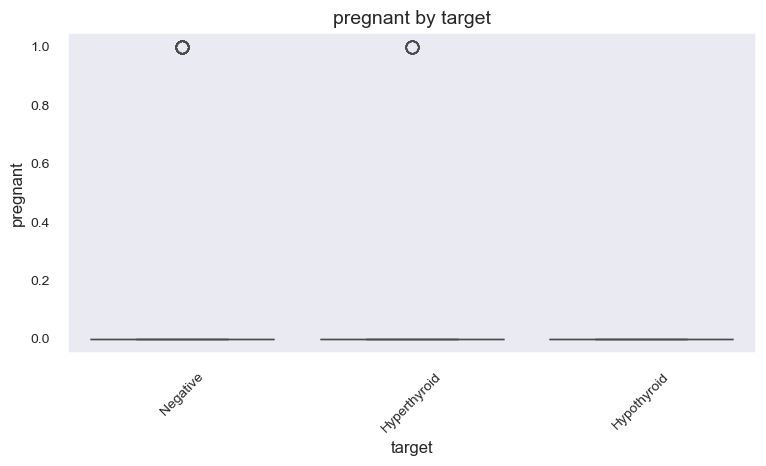

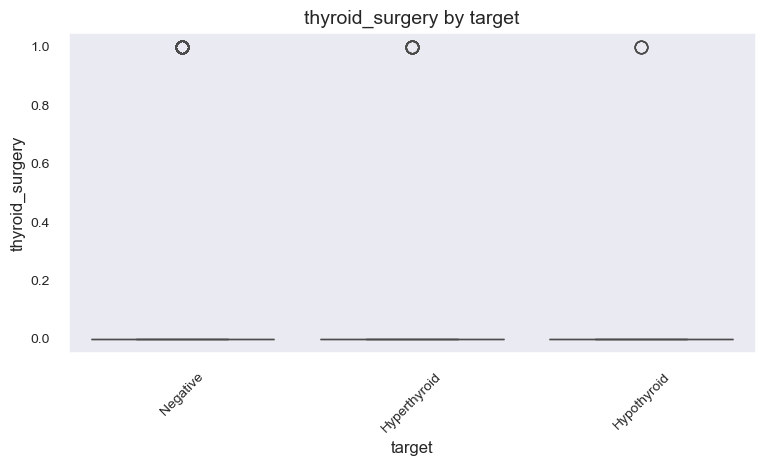

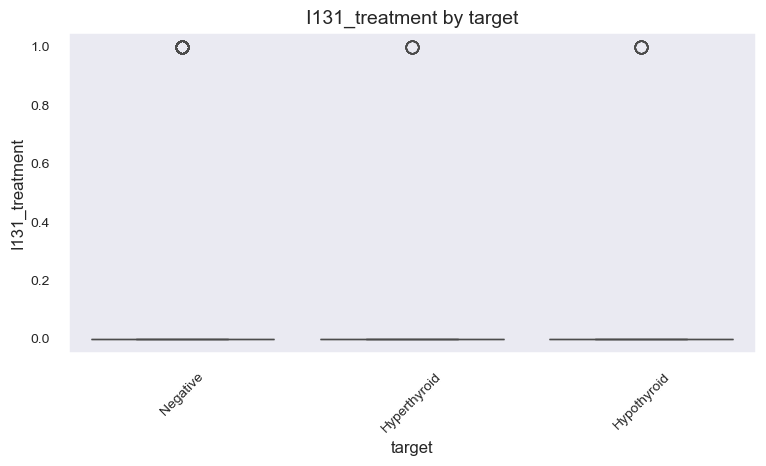

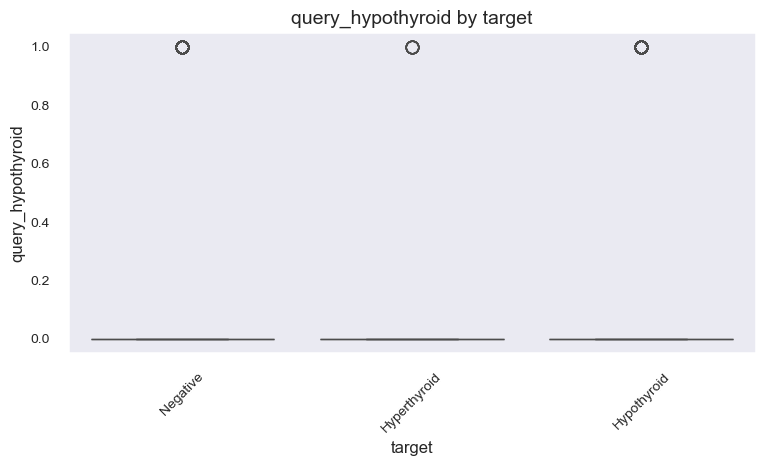

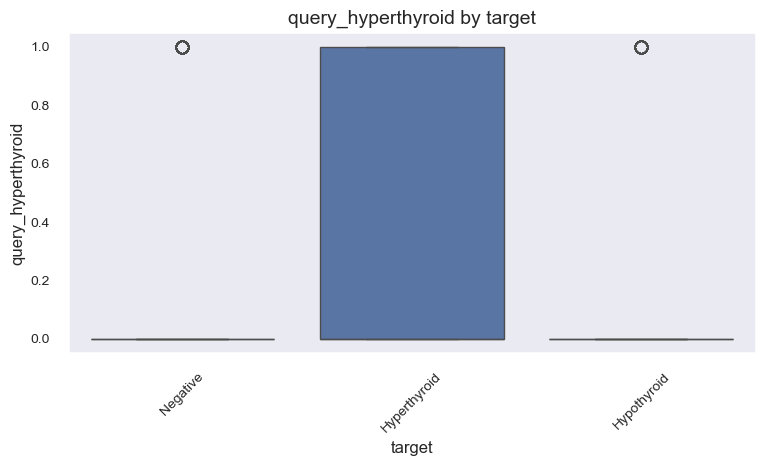

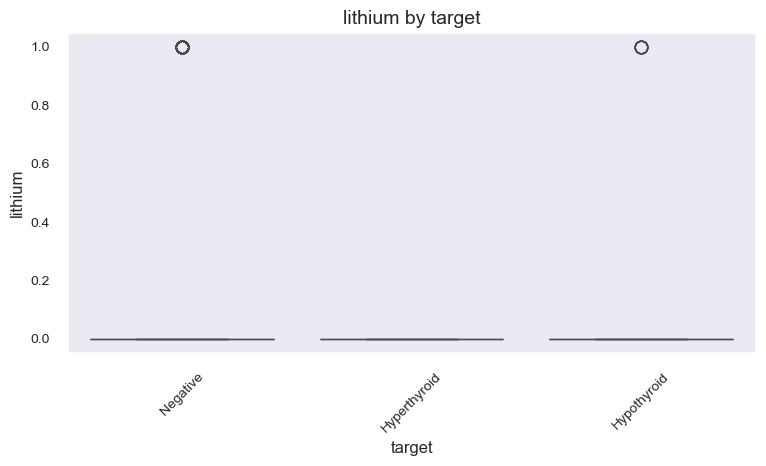

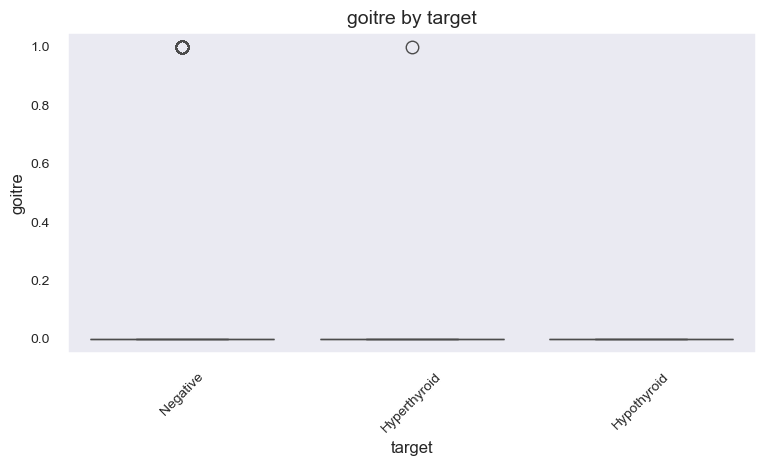

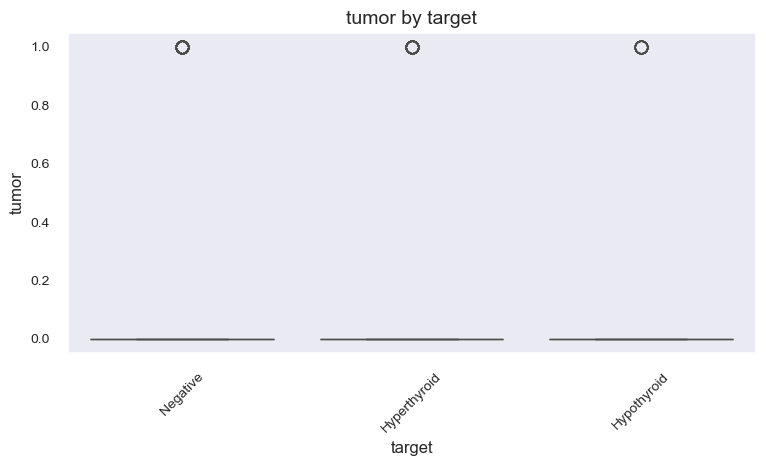

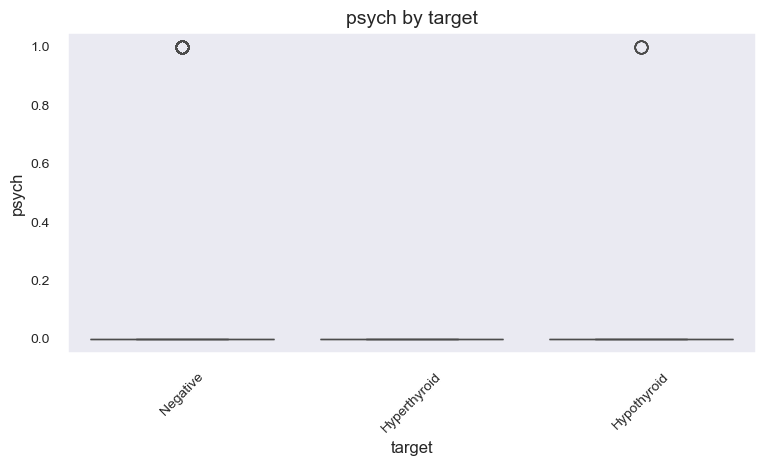

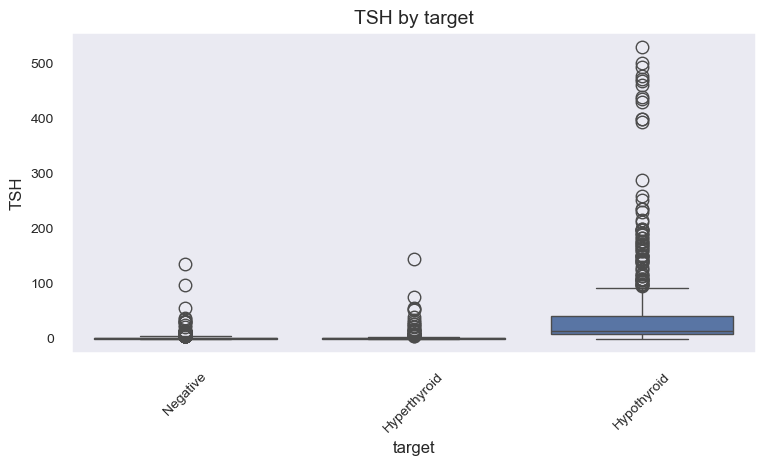

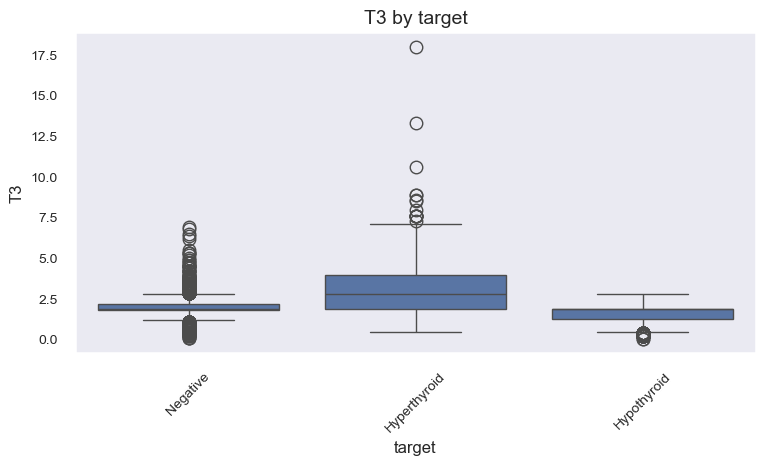

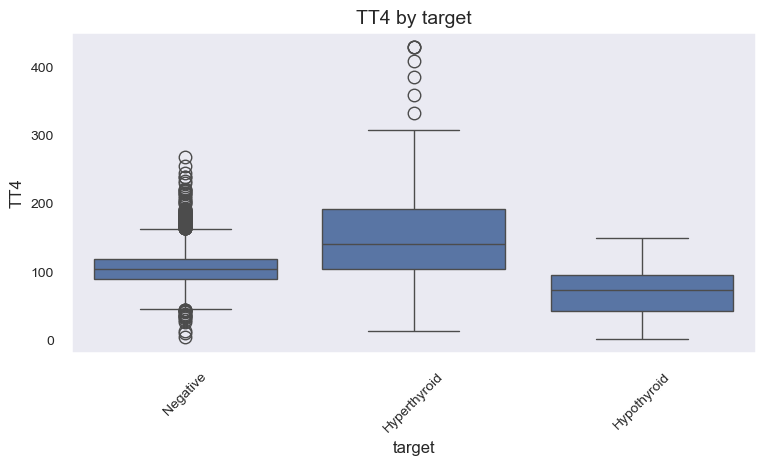

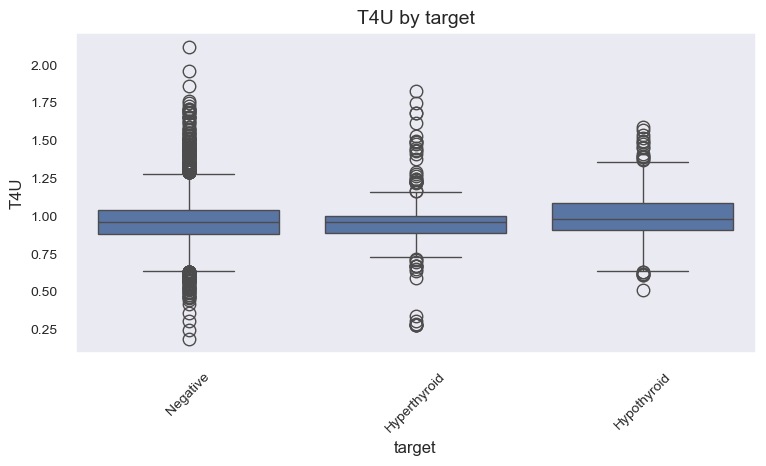

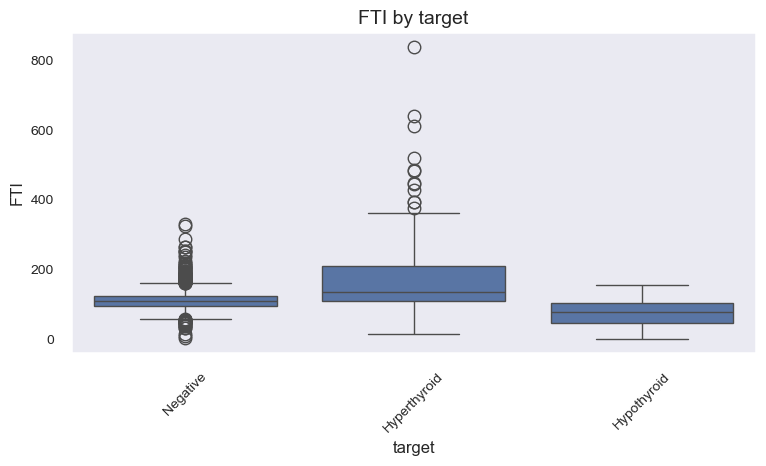

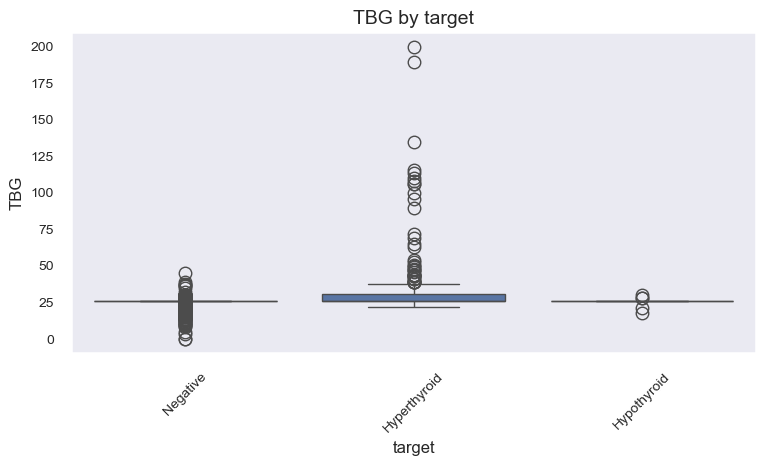

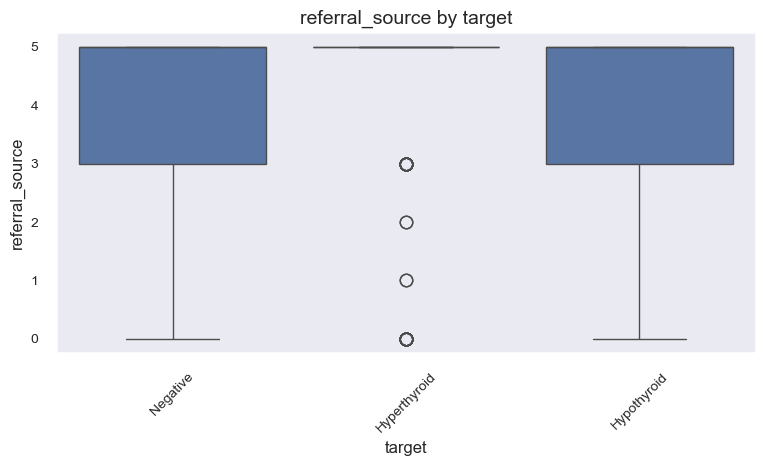

In [61]:
# Remove measured columns before plotting
filtered_columns = [col for col in df.columns if not col.endswith('_measured')]

# Identify categorical and numeric columns again (without measured ones)
categorical_columns = df[filtered_columns].select_dtypes(include=['object', 'category', 'bool']).columns
numeric_columns = df[filtered_columns].select_dtypes(include=['int64', 'float64']).columns

# Bivariate Analysis - Categorical vs Numeric (one plot per pair)
if len(categorical_columns) > 0:
    for cat_col in categorical_columns:
        for num_col in numeric_columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=df, x=cat_col, y=num_col)
            plt.title(f'{num_col} by {cat_col}', fontsize=14)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


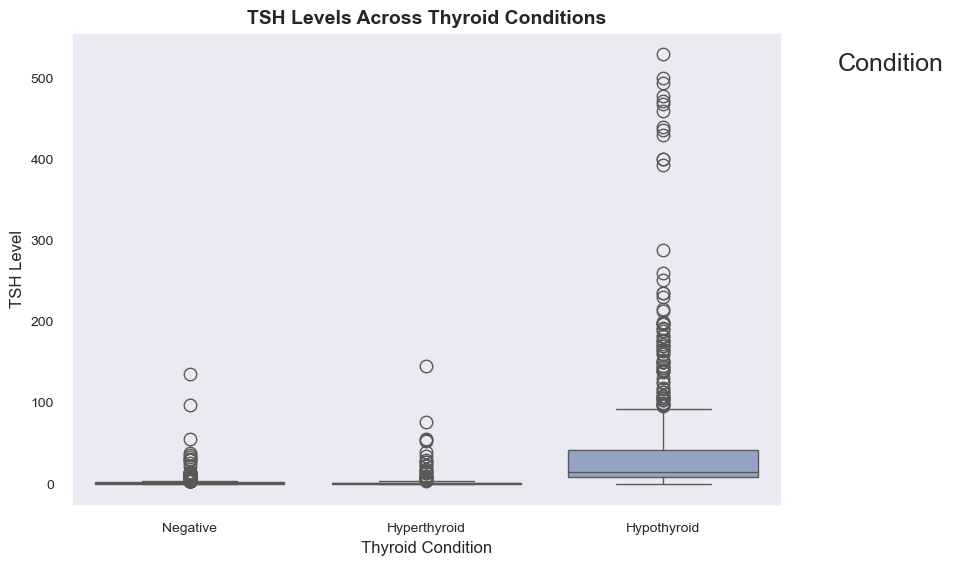


TSH Summary Statistics by Condition:
               count       mean        std    min    25%   50%   75%    max
target                                                                     
Hyperthyroid   313.0   3.134201  11.491466  0.005  0.055   1.4   1.4  145.0
Hypothyroid    601.0  44.250250  77.404973  0.100  8.200  15.0  42.0  530.0
Negative      6767.0   1.664945   2.731980  0.005  0.620   1.4   2.1  136.0




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


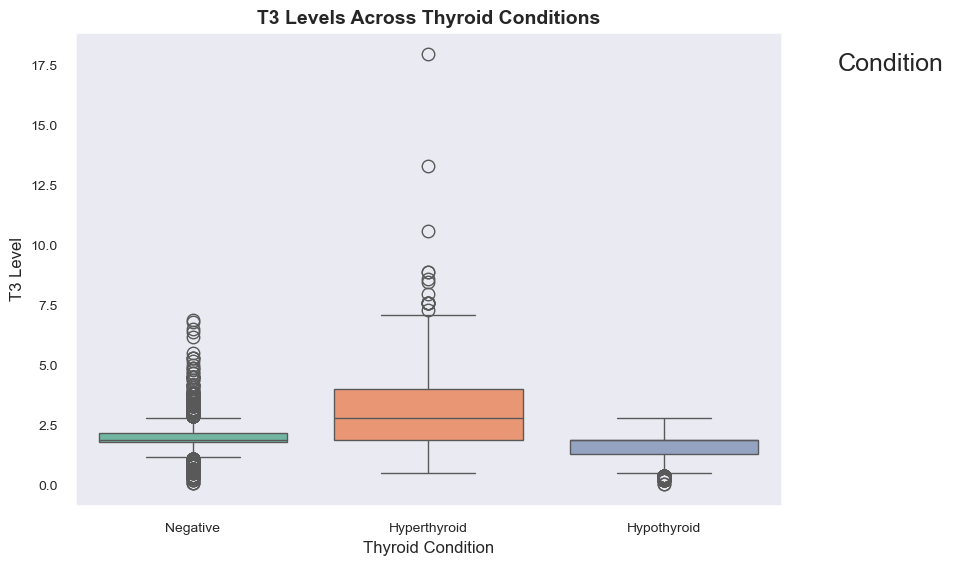


T3 Summary Statistics by Condition:
               count      mean       std   min  25%  50%  75%   max
target                                                             
Hyperthyroid   313.0  3.229073  1.996941  0.50  1.9  2.8  4.0  18.0
Hypothyroid    601.0  1.566556  0.616594  0.05  1.3  1.9  1.9   2.8
Negative      6767.0  1.963031  0.472884  0.10  1.8  1.9  2.2   6.9




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


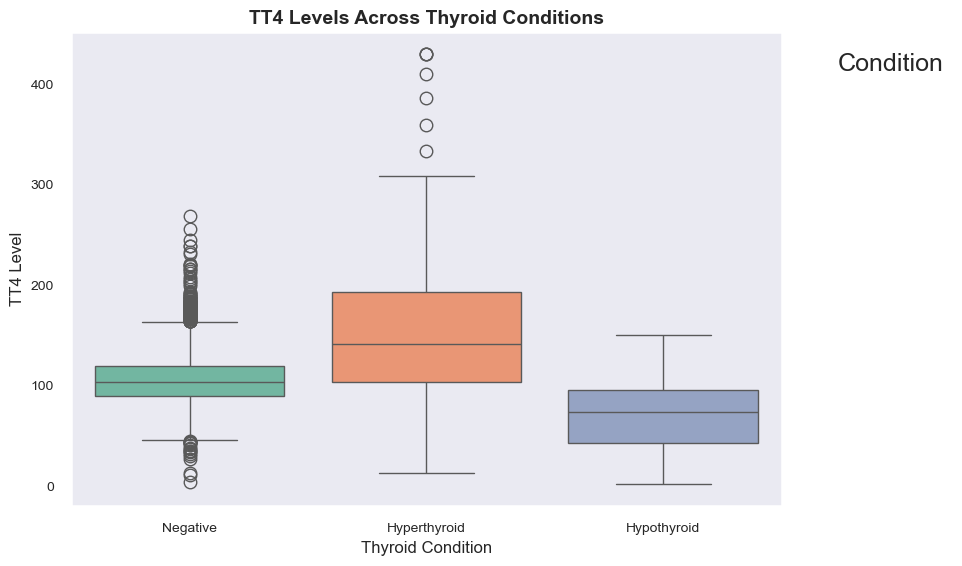

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')



TT4 Summary Statistics by Condition:
               count        mean        std   min    25%    50%    75%    max
target                                                                       
Hyperthyroid   313.0  152.000000  72.260480  13.0  104.0  141.0  193.0  430.0
Hypothyroid    601.0   69.516905  36.783959   2.0   43.0   74.0   96.0  150.0
Negative      6767.0  105.850746  24.062693   4.0   90.0  104.0  119.5  269.0




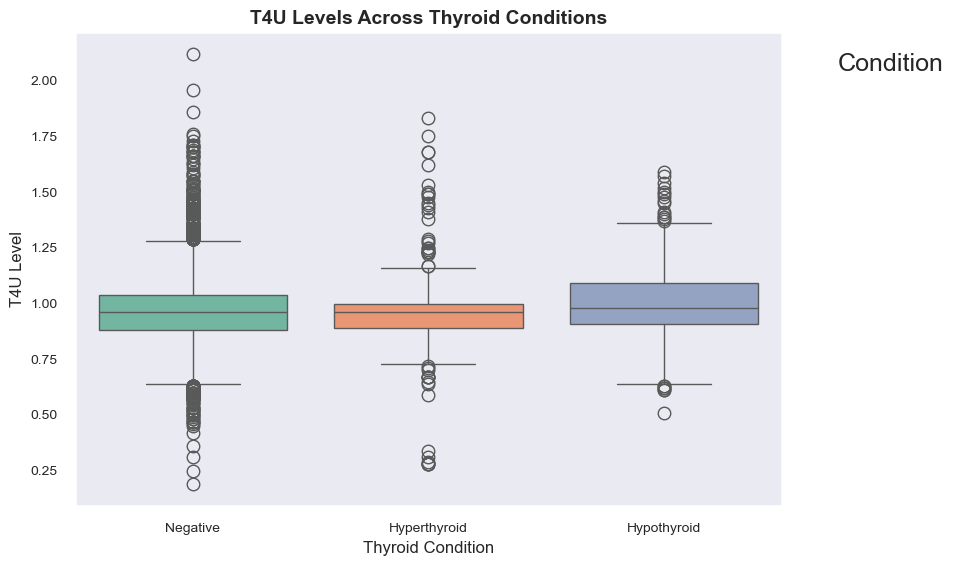


T4U Summary Statistics by Condition:
               count      mean       std   min   25%   50%   75%   max
target                                                                
Hyperthyroid   313.0  0.963770  0.201093  0.28  0.89  0.96  1.00  1.83
Hypothyroid    601.0  1.007188  0.158211  0.51  0.91  0.98  1.09  1.59
Negative      6767.0  0.964143  0.152420  0.19  0.88  0.96  1.04  2.12




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


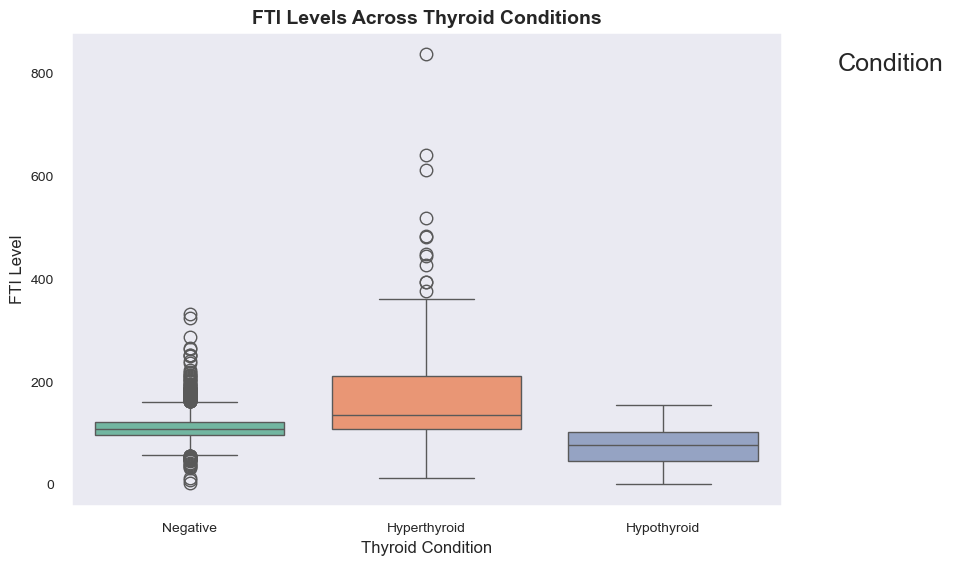


FTI Summary Statistics by Condition:
               count        mean         std   min    25%    50%    75%    max
target                                                                        
Hyperthyroid   313.0  168.607029  101.782332  14.0  109.0  136.0  211.0  839.0
Hypothyroid    601.0   72.258552   37.053011   1.4   46.0   78.0  103.0  155.0
Negative      6767.0  110.758756   22.366348   3.5   97.0  109.0  123.0  332.0




/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/3262828702.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')


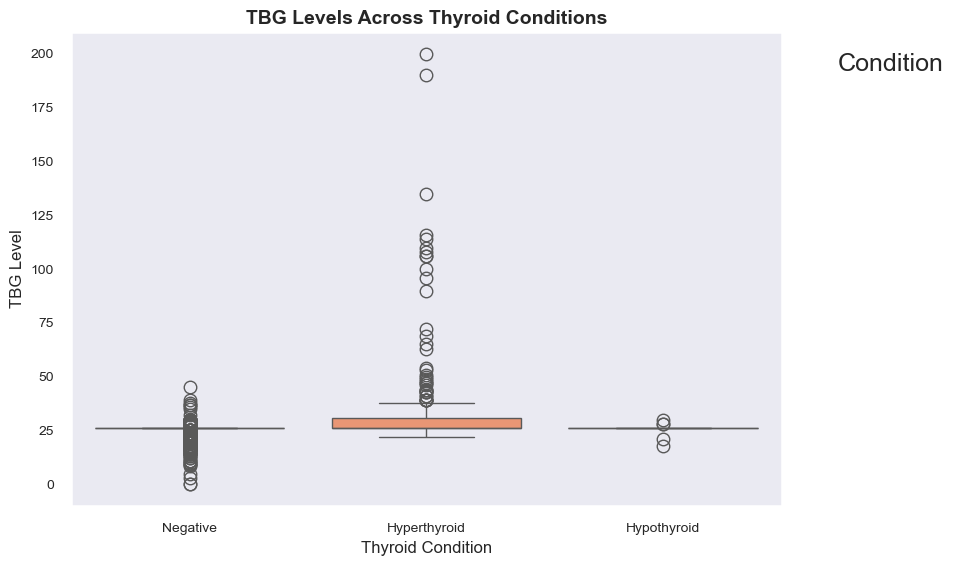


TBG Summary Statistics by Condition:
               count       mean        std   min   25%   50%   75%    max
target                                                                   
Hyperthyroid   313.0  32.690096  20.413116  22.0  26.0  26.0  31.0  200.0
Hypothyroid    601.0  25.991681   0.433894  18.0  26.0  26.0  26.0   30.0
Negative      6767.0  25.885082   1.317515   0.1  26.0  26.0  26.0   45.0




In [62]:
# Visualize hormone level distributions across different thyroid conditions
# This is CRITICAL for understanding which hormones are most diagnostic

hormone_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for hormone in hormone_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df, x='target', y=hormone, hue='target', palette='Set2')
    plt.title(f'{hormone} Levels Across Thyroid Conditions', fontsize=14, fontweight='bold')
    plt.xlabel('Thyroid Condition', fontsize=12)
    plt.ylabel(f'{hormone} Level', fontsize=12)
    plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for each condition
    print(f"\n{hormone} Summary Statistics by Condition:")
    print(df.groupby('target')[hormone].describe())
    print("\n" + "="*60 + "\n")

# Key Medical Insights to Look For:
# 
# TSH (Thyroid Stimulating Hormone):
#   - Hypothyroid: HIGH TSH (pituitary trying to stimulate thyroid)
#   - Hyperthyroid: LOW TSH (pituitary suppressing due to excess hormones)
#   - Negative: Normal range (0.4-4.0 mIU/L)
#
# T3 (Triiodothyronine):
#   - Hypothyroid: LOW T3
#   - Hyperthyroid: HIGH T3
#   - Negative: Normal range
#
# TT4 (Total Thyroxine):
#   - Hypothyroid: LOW TT4
#   - Hyperthyroid: HIGH TT4
#   - Negative: Normal range
#
# T4U, FTI, TBG: Supporting diagnostic markers
#
# Expected Observation: Clear separation in hormone levels between conditions
# This confirms that hormone levels are strong predictors for thyroid disorders

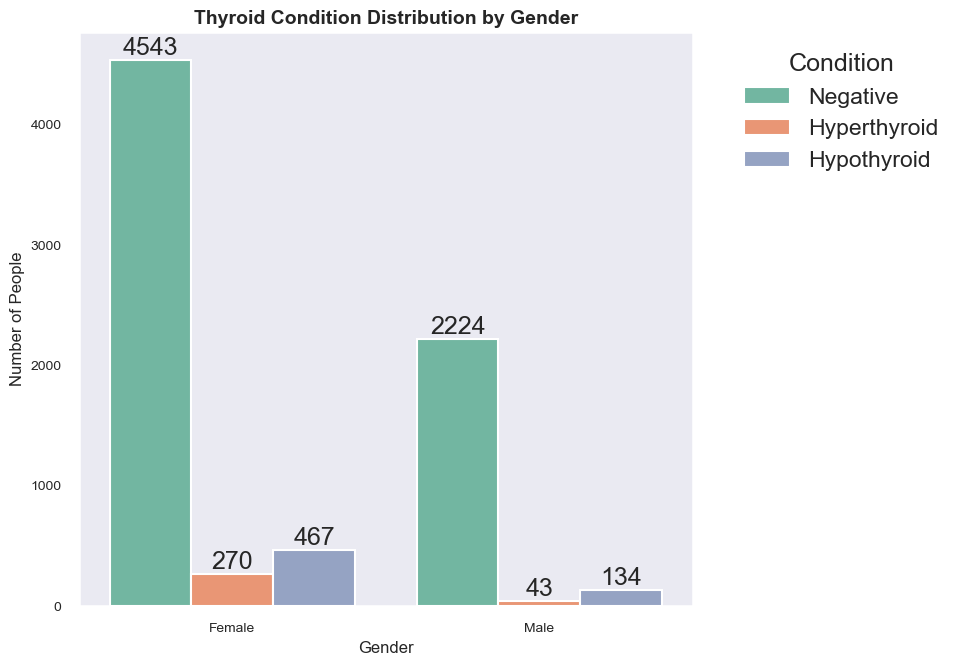

/var/folders/hl/110lkfyx5nz36v12z89t8gfr0000gn/T/ipykernel_827/194302884.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='age', palette='Set2')


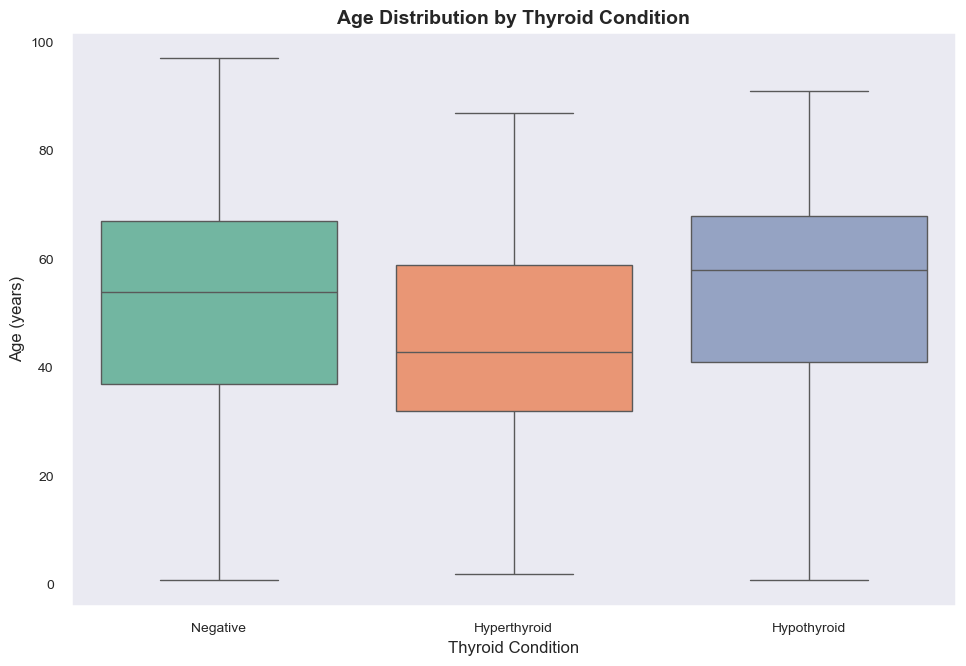

In [63]:
# Analyze relationship between gender and thyroid conditions
# Medical research shows thyroid disorders are more common in females

plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='sex', hue='target', palette='Set2')

# Map binary encoding to readable labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Thyroid Condition Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Expected Observation:
# - Females typically have higher rates of thyroid disorders (especially hypothyroidism)
# - This is consistent with medical literature (women 5-8x more likely than men)
# - Gender is likely an important feature for the model

# Analyze age distribution across thyroid conditions
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='target', y='age', palette='Set2')
plt.title('Age Distribution by Thyroid Condition', fontsize=14, fontweight='bold')
plt.xlabel('Thyroid Condition', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.tight_layout()
plt.show()

# Expected Observations:
# - Hypothyroidism: Often increases with age (especially in elderly)
# - Hyperthyroidism: Can occur at any age, but peaks in middle age
# - Age is likely an important predictive feature

### Bivariate Analysis Observations

#### Numeric Variable Relationships:

1. **Strong Positive Correlations:**
   - T3 and FTI show a notable positive relationship
   - TSH levels correlate positively with certain other thyroid markers
   - These relationships suggest coordinated hormone regulation

2. **Strong Negative Correlations:**
   - TT4 and T4U demonstrate an inverse relationship
   - Several hormone pairs show negative correlations, indicating possible feedback mechanisms

3. **Non-linear Relationships:**
   - Some variable pairs show non-linear patterns in their scatter plots
   - The presence of clusters in certain relationships suggests potential subgroups
   - Some relationships show heteroscedasticity (varying spread)

#### Categorical vs. Numeric Relationships:

1. **Distribution Patterns:**
   - Different thyroid conditions show distinct patterns in hormone levels
   - Some conditions are characterized by extreme values in specific measurements
   - There's notable overlap in hormone ranges between some conditions

2. **Group Differences:**
   - Clear separation between some diagnostic groups for certain hormones
   - Some groups show higher variability than others
   - Certain hormone combinations appear more diagnostic than others

#### Key Insights:
1. The relationships between hormones reveal complex feedback mechanisms
2. Some hormone combinations might be more useful for diagnosis than others
3. The presence of distinct patterns in different diagnostic groups suggests potential for predictive modeling
4. The overlap between groups indicates the challenge in using single measurements for diagnosis

#### Clinical Implications:
- Multiple hormone measurements should be considered together for diagnosis
- Some hormone relationships might be more reliable indicators than individual values
- The presence of clear group differences supports the use of these measurements for diagnosis
- Non-linear relationships suggest the need for sophisticated analysis methods

### 3. Multivariate Analysis

This section explores relationships between multiple variables simultaneously to uncover complex patterns and interactions.

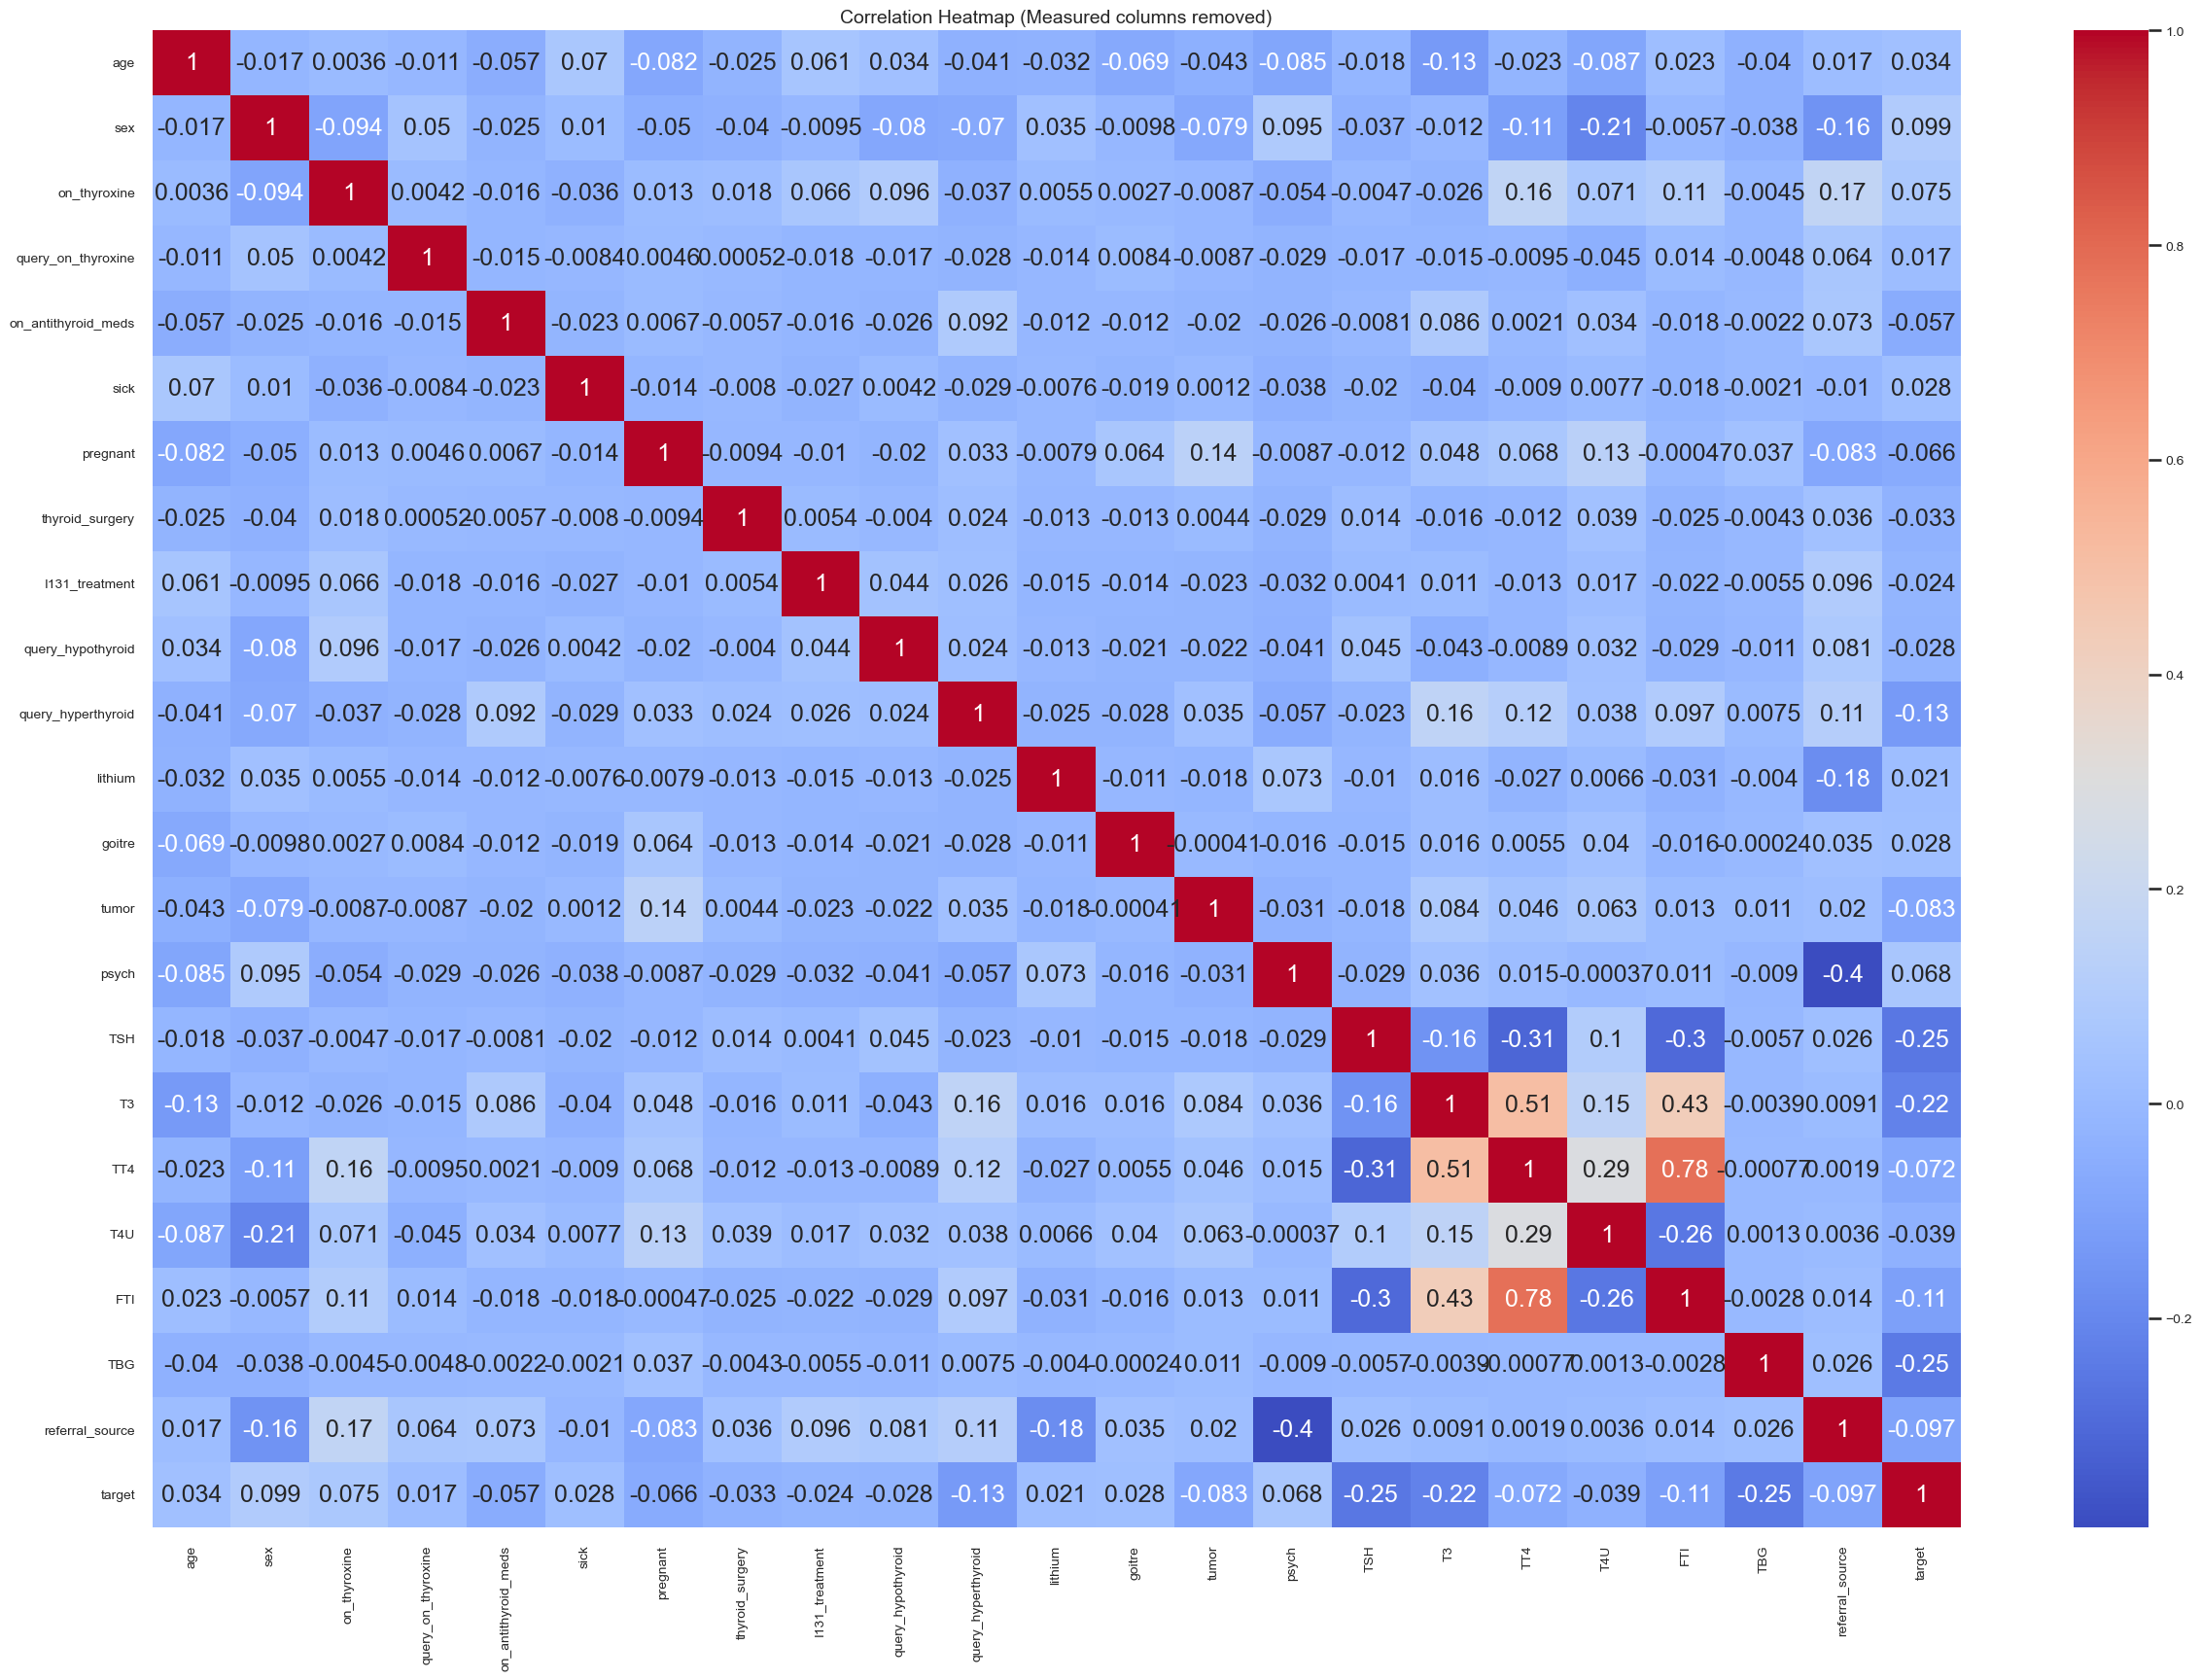

In [68]:
# Drop columns ending with '_measured'
df_corr = df.drop(columns=[col for col in df.columns if col.endswith('_measured')])

# Encode 'target' numerically
df_corr['target'] = le.fit_transform(df_corr['target'])

# Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include='number')
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Measured columns removed)')
plt.show()

### Multivariate Observations

#### Key Findings:
1. **Strong Positive Correlations:**
   - TSH and FTI show a significant positive correlation, indicating that as TSH levels increase, FTI tends to increase as well
   - T3 and FTI demonstrate a positive relationship, suggesting these thyroid hormones move in the same direction

2. **Strong Negative Correlations:**
   - TT4 and T4U exhibit a notable negative correlation, meaning as one increases, the other tends to decrease
   - TSH shows inverse relationships with several other metrics

3. **Moderate Correlations:**
   - T4U and FTI show a moderate relationship
   - T3 has moderate correlations with several other thyroid markers

4. **Weak/No Correlations:**
   - Some pairs of measurements show very weak correlations (close to 0), suggesting they might be independently regulated

### Clinical Implications:
- The strong correlations between certain markers could be useful for predicting one value based on another
- The negative correlations highlight the complex feedback mechanisms in thyroid function
- Independent markers might be particularly useful for comprehensive thyroid assessment since they provide unique information

### Recommendations:
- Consider these relationships when interpreting thyroid function tests
- Pay special attention to strongly correlated pairs when one measurement is abnormal
- Use weakly correlated markers to get a more complete picture of thyroid function